# **Health Care Dataset**

<div style="text-align: justify; font-weight: bold;">
<i>Abstract</i> — In this computer assignment, we want to perform statistical analysis on healthCare dataset. We will use methods that we learnt in Statistical Inference. Also, we will use R programming language to reach this goal.
    
<i>Keywords</i> — Statistical Inference, R
 </div>

### **Introduction**
<br/>
<div style="text-align: justify;"> 
The aim of this computer assignment is to perform analysis tasks on different columns of dataset too get a good view of it that will be valuable for next phase of this project.
</div>

### **Importing Libraries**


In this part, we will import some of the necessary libraries in order to use their helpful functions. Firstly, we will install related packages. Secondly, we will use `library()` function to import them.

In [ ]:
install.packages("plyr")
install.packages("e1071")
install.packages("psych")
install.packages("dplyr")
install.packages("hexbin")
install.packages("ggExtra")
install.packages("GGally")
install.packages("ggcorrplot")
install.packages("scatterplot3d")

In [ ]:
library(ggplot2)
library(plyr)
library(e1071)
library(psych)
library(dplyr)
library(hexbin)
library(ggExtra)
library(GGally)
library(ggcorrplot)
library(scatterplot3d)

### __Importing Data__
In this part, file *HealthCare.csv* is coppied to the project directory, then we read and store it in a dataframe called *heathCare*.

In [3]:
healthCare <- read.csv("/content/HealthCare.csv")

`describe()` method from *psych* library is used in order to view some basic statistical details like max, min, median, mean, sd etc. of the dataframe.



In [4]:
describe(healthCare)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,5110,3.651783e+04,2.116172e+04,36932.000,36542.259051,27413.27400,67.00000,72940.000,72873.000,-0.01990129,-1.2130551,2.960333e+02
gender*,2,5110,1.414286e+00,4.930436e-01,1.000,1.392613,0.00000,1.00000,3.000,2.000,0.35280467,-1.8626789,6.897233e-03
age,3,5110,4.322661e+01,2.261265e+01,45.000,43.607877,26.68680,0.08000,82.000,81.920,-0.13697887,-0.9920009,3.163304e-01
hypertension,4,5110,9.745597e-02,2.966067e-01,0.000,0.000000,0.00000,0.00000,1.000,1.000,2.71379770,5.3657481,4.149258e-03
heart_disease,5,5110,5.401174e-02,2.260630e-01,0.000,0.000000,0.00000,0.00000,1.000,1.000,3.94492690,13.5651030,3.162416e-03
ever_married*,6,5110,1.656164e+00,4.750335e-01,2.000,1.695205,0.00000,1.00000,2.000,1.000,-0.65735918,-1.5681857,6.645288e-03
work_type*,7,5110,3.495499e+00,1.278532e+00,4.000,3.619374,0.00000,1.00000,5.000,4.000,-0.90939410,-0.4867496,1.788550e-02
Residence_type*,8,5110,1.508023e+00,4.999845e-01,2.000,1.510029,0.00000,1.00000,2.000,1.000,-0.03208864,-1.9993615,6.994330e-03
avg_glucose_level,9,5110,1.061477e+02,4.528356e+01,91.885,97.846204,26.06411,55.12000,271.740,216.620,1.57136092,1.6758301,6.334759e-01


`summary()` method concise summary of dataset. It prints information about the dataframe such as min, max, quartiles, and mean.



In [5]:
summary(healthCare)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
                                                                     
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                            

### __Cleaning Data__
In this part, we will convert the column values that are in a wrong format to an appropriate format. Values in **hypertension**, **heart_disease**, and **stroke** are stored as Integer but they categorical variables and it would be better to store them as String. This can be done by using `mapvalues()` method from *plyr* library.

In [6]:
healthCare$hypertension <- mapvalues(healthCare$hypertension,
                           from = c(0, 1),
                           to = c("No", "Yes"))

In [7]:
healthCare$heart_disease <- mapvalues(healthCare$heart_disease,
                           from = c(0, 1),
                           to = c("No", "Yes"))

In [8]:
healthCare$stroke <- mapvalues(healthCare$stroke,
                           from = c(0, 1),
                           to = c("No", "Yes"))

Moreover, one task is left that we shoud do in cleaning data. For gender column there is a class called **Other**. At first, we have to count rows with this value.

In [9]:
healthCare[(healthCare$gender=="Other"),]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_bills
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
3117,56156,Other,26,No,No,No,Private,Rural,143.33,22.4,formerly smoked,No,2241.059


Based on the result, there is only one row with this value. So, we can drop it because it is not informative.

In [10]:
healthCare <- healthCare[!(healthCare$gender=="Other"),]

### __Question 0__

#### __Part A__
It is undeniable that we should pay attention to our health situation in each. Moreover, as we get older, we will face many health problems and without a good plan, we won't be able to overcome the expences of different treatments. So, we have to be familiar with important factors that can cause health issues for us. Maybe by having this knowledge we would be more careful about our habits to be in a better health situation. 

This dataset provides some of the factors that we mentioned above. So, it be valuable to analyze it.


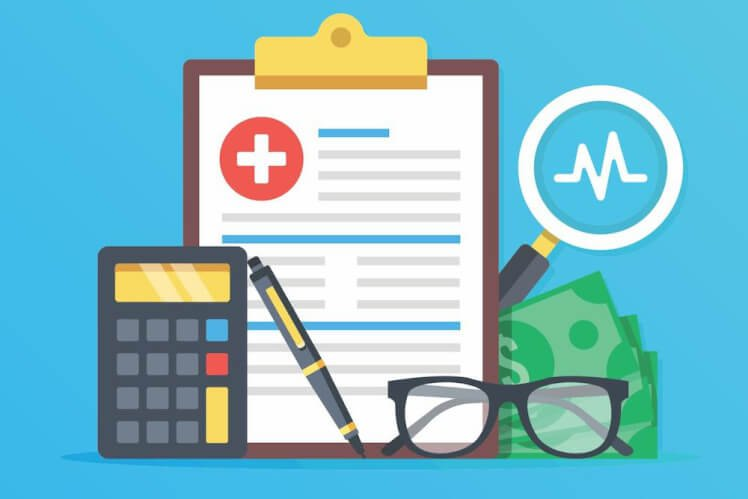

#### __Part B__
In this part we will take a  look on the columns of our dataset to get a good sight about it. We have 13 features and 5110 observations in our dataset that we will discuss each of them in this part.



1.   **id** 

        It is a unique number that is assigned to the person in our dataset.


2.   **gender**

        It is the person gender.
        *   Female
        *   Male


3.   **age**
          
        It is the person age in years. 


4.   **hypertension**
          
        It is the whether person hypertension. It is also called high blood pressure that means the blood pressure is higher than normal.
        *   Yes
        *   No



5.   **heart disease**
          
        It determines whether the person suffers from any heart disease or not. Heart disease refers to any condition affecting the heart.
        *   Yes
        *   No



6.   **ever marrid**
          
        It determines whether the person has ever marrid or not.
        *   Yes
        *   No


7.   **work type**
          
        It defines the type of work a person does.
        *   Private
        *   Self-employed
        *   Govt_job
        *   children
        *   Never_worked


8.   **residence type**
          
        It defines the type of residece a person lives in.
        *   Urban
        *   Rural


9.   **avg glucose level**
          
        It is the person average glucose level. Average glucose level is the measure of concentration of glucose present in the blood of humans. Its unit is mg/dL.


10.  **bmi**
          
        It is the person body mass index which can be computed by dividing the body mass by the square of the body height. Its unit is kg/m2.


11.  **smoking status**
          
        It is the person smoking status. 
        *   formerly smoked
        *   never smoked
        *   smokes
        *   Unknown


12.  **stoke**
          
        It determines whether the person is suffered from stroke or not. A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.
        *   Yes
        *   No



13.  **health bills**
          
        It is the amount of money that the person spend yearly on her/his health in $.




In [11]:
str(healthCare)

'data.frame':	5109 obs. of  13 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : chr  "No" "No" "No" "No" ...
 $ heart_disease    : chr  "Yes" "No" "Yes" "No" ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 NA 32.5 34.4 24 29 27.4 22.8 NA 24.2 ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ health_bills     : num  6012 NA 6385 5863 5461 ...


Based on the result, we are interested in health_bills variable and it would be valuable to predict it using other features.

#### __Part C__
In this part, we will use a combination of `colMeans()` and `is.na()` methods in order to compute proportion of nan values in each column.

In [12]:
colMeans(is.na(healthCare))

id            gender               age      hypertension 
       0.00000000        0.00000000        0.00000000        0.00000000 
    heart_disease      ever_married         work_type    Residence_type 
       0.00000000        0.00000000        0.00000000        0.00000000 
avg_glucose_level               bmi    smoking_status            stroke 
       0.00000000        0.03934234        0.00000000        0.00000000 
     health_bills 
       0.03934234

Based on the result, **bmi** and **health_bills** have about 4% nan values. 

One of the methods to deal with these value is to replace them with a statistic of that column.

For **bmi** we will use mean to replace missing values, because it has an aproximately normal distribution as its median and mean are close to each other. 

In [13]:
healthCare[c("bmi")][is.na(healthCare[c("bmi")])] <- mean(healthCare$bmi, na.rm=TRUE)

For **health_bills** it seems that median can be a better statistic to replace nan values with. 

In [14]:
healthCare[c("health_bills")][is.na(healthCare[
  c("health_bills")])] <- median(healthCare$health_bills, na.rm=TRUE)

#### __Part D__
It would be difficult to determine important features without performing any analysis on dataset. However, to my mind, **smoking_status** and **bmi** can be the two most important features in our dataset.

In [15]:
summary(healthCare)

       id           gender               age        hypertension      
 Min.   :   67   Length:5109        Min.   : 0.08   Length:5109       
 1st Qu.:17740   Class :character   1st Qu.:25.00   Class :character  
 Median :36922   Mode  :character   Median :45.00   Mode  :character  
 Mean   :36514                      Mean   :43.23                     
 3rd Qu.:54643                      3rd Qu.:61.00                     
 Max.   :72940                      Max.   :82.00                     
 heart_disease      ever_married        work_type         Residence_type    
 Length:5109        Length:5109        Length:5109        Length:5109       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

### __Question 1__
In this question we choose **BMI** feature as a numerical variable to perform following task with. Because it is one of the important factors that should be considered to predict health bills.

#### __Part A__
In this part,we will draw histogram along with density curve. For choosing bin with, we use square-root of n (number of observation) which we learnt in class.

Based on the result, the distribution of **bmi** is unimodal. In other words, it has one maximum. 

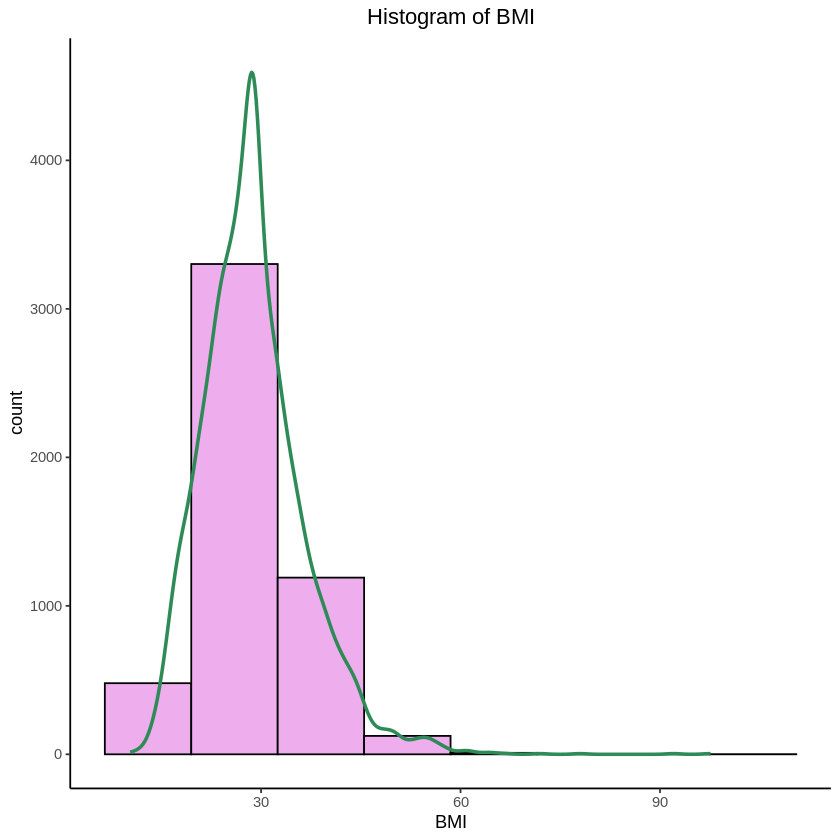

In [16]:
bmi <- healthCare$bmi
n <- 1000
binwidth <- ceiling(log2(length(bmi)))
bmiDensHist <- ggplot(healthCare, aes(x=bmi)) 
bmiDensHist <- bmiDensHist + geom_histogram(aes(y=..count..), fill ="plum2", colour="black",
                                                                          binwidth = binwidth) 
bmiDensHist <- bmiDensHist + geom_line(aes(y = ..density.. * n * binwidth), color = "seagreen4", 
                                                                  size = 1, stat = 'density')
bmiDensHist <- bmiDensHist + xlab("BMI")
bmiDensHist <- bmiDensHist + ylab("count")
bmiDensHist <- bmiDensHist + ggtitle("Histogram of BMI")
bmiDensHist <- bmiDensHist + theme_classic()
bmiDensHist <- bmiDensHist + theme(plot.title = element_text(hjust = 0.5))
bmiDensHist

#### __Part B__
In this part, we use QQ-Plot in order to compare the distribution of this variable with normal distribution. As we can see, points bend up and to the left of the line. So, it is right-skewed.

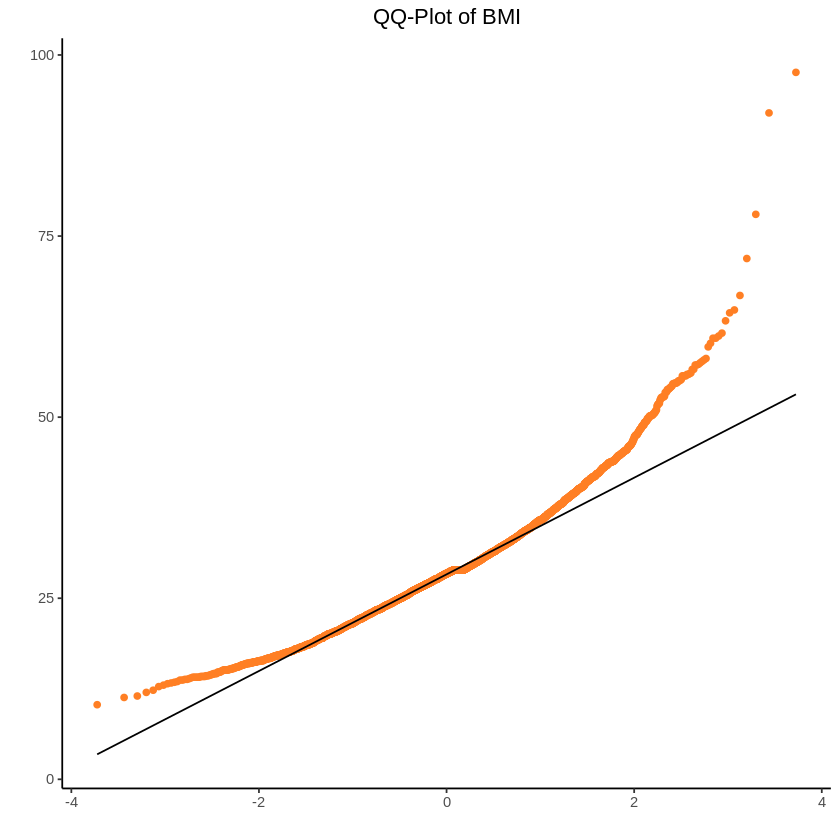

In [17]:
bmiQQ <- ggplot(healthCare, aes(sample=bmi))
bmiQQ <- bmiQQ + geom_qq(col= "chocolate1")
bmiQQ <- bmiQQ + ggtitle("QQ-Plot of BMI")
bmiQQ <- bmiQQ + xlab("") + ylab("")
bmiQQ <- bmiQQ + theme_classic()
bmiQQ <- bmiQQ + theme(plot.title = element_text(hjust = 0.5))
bmiQQ <- bmiQQ + geom_qq_line(geom = "path", position = "identity")
bmiQQ

#### __Part C__
**Skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined. 

When it is negative, it shows that the mean of data is less than the median and therefore we the distribution is left-skewed. Conversely if it is positive, it shows that the distribuion of data is right-skewed. Finally if it is zero, it means that the distribuion is symmetric.

In this part we will use `skewness()` method from *e1071* library to compute the skewness of **bmi**.

In [18]:
skewness(bmi)

[1] 1.075806

Based on the result, the skewness of this vaariable is positive. So, the distribution of this variable is right-skewed. We guessed this point in previous parts and now by computing we are sure about it.

#### __Part D__
In this part, we will use the combination of `str()` and `boxplot.stats()` to get parameters of box plot such as whiskers, quartiles, outliers and etc. We should note that the first and last element of stats are whiskers and all the data points that are out of this range consider as outliers.

In [19]:
str(boxplot.stats(bmi))

List of 4
 $ stats: num [1:5] 11.3 23.8 28.4 32.8 46.2
 $ n    : int 5109
 $ conf : num [1:2] 28.2 28.6
 $ out  : num [1:126] 48.9 47.5 56.6 50.1 54.6 60.9 54.7 48.2 64.8 47.3 ...


Based on the result, we can see that **bmi** has 126 outliers. 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. These values can give us interesting information about data. 

In this part, we will print all the outliers baseed on whiskers.

In [20]:
outliers <- c(bmi[bmi < 11.3], bmi[bmi > 46.2])
outliers

[1] 10.3 48.9 47.5 56.6 50.1 54.6 60.9 54.7 48.2 64.8 47.3 46.5 46.6 54.7 49.8
 [16] 60.2 51.0 51.5 71.9 50.2 47.8 54.6 55.7 55.7 57.5 54.2 52.3 50.3 78.0 50.2
 [31] 53.4 55.2 48.4 50.6 49.5 55.0 54.8 50.2 47.5 52.8 66.8 55.1 48.5 55.9 57.3
 [46] 49.8 56.0 51.8 57.7 48.9 49.3 49.8 54.0 56.1 97.6 53.9 49.4 48.5 49.2 48.7
 [61] 48.9 53.8 46.5 48.8 52.7 52.8 55.7 53.5 50.5 51.9 63.3 52.8 61.2 48.0 46.8
 [76] 50.1 48.3 58.1 49.3 50.4 52.7 48.3 49.3 51.9 53.4 50.3 59.7 47.4 52.5 52.9
 [91] 54.7 61.6 49.9 53.8 47.3 54.3 47.9 55.0 50.9 50.6 57.2 64.4 92.0 50.8 55.9
[106] 57.9 47.6 55.7 48.8 57.2 47.5 46.4 46.9 50.2 47.1 48.1 51.7 60.9 47.8 47.6
[121] 46.3 54.1 56.6 49.5 47.6 46.9

This amount of outliers shows that there is a posibility of error in calculation of BMI that might be made by individuals if they reported it themselves. Moreover if we just asked the weight and height of people, it would be possible that they didn't report the correct values.

#### __Part E__
We use `mean()` function to compute the mean of bmi. 

In [21]:
mean(bmi)

[1] 28.89456

 We use `median()` function to compute the median of bmi. It is the midpoint of the distribution. In other words, 50% of the individuals in our sample have bmi less than this value and 50% of them have bmi greater than it. 

In [22]:
median(bmi)

[1] 28.4

 We use `var()` function to compute the variance of bmi. It is roughly the average squared deviation from the mean. It indicates the degree of spread in the dataset. The more spread the data, the larger the variance is in relation to the mean. It shows that how much the individuals bmi are away from the mean bmi.

In [23]:
var(bmi)

[1] 59.26282

 We use `sd()` function to compute the standard deviation of bmi. It is roughly the average deviation from the mean that has the same units as the data. It provides an indication of how far the individuals bmi deviate from the mean bmi. 

In [24]:
sd(bmi)

[1] 7.698235

#### __Part F__
In this part, we cwill plot density plot of bmi distribution. 

Median of a density curve is the equal-area point, the point with half the area under the curve to its left and the other half to its right.

Mean is the point at which the curve would balance if made of solid material.

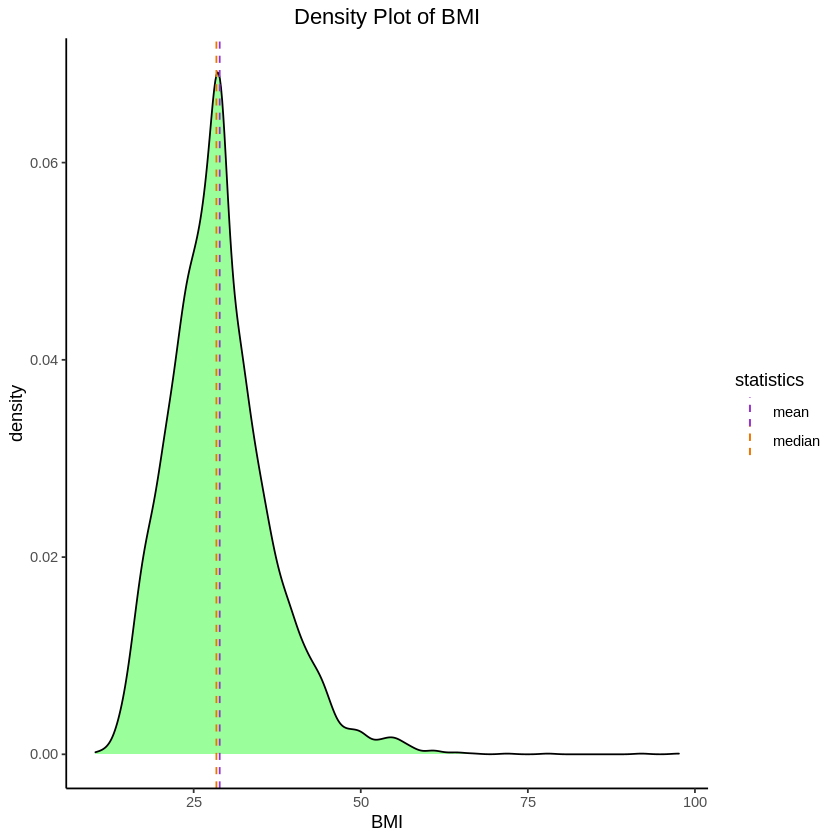

In [25]:
bmiStatistics <- healthCare %>% summarize(mean = mean(bmi), median = median(bmi))

bmiDensity <- ggplot(healthCare, aes(x=bmi))
bmiDensity <- bmiDensity + geom_density(color="black", fill="palegreen1")
bmiDensity <- bmiDensity + geom_vline(data = bmiStatistics, aes(xintercept = mean, color= "mean"), 
                                        linetype = "dashed")
bmiDensity <- bmiDensity + geom_vline(data = bmiStatistics, aes(xintercept = median, color= "median"), 
                                        linetype = "dashed")
bmiDensity <- bmiDensity + scale_color_manual(name = "statistics", 
                  values = c(mean = "darkorchid", median = "darkorange2"))  
bmiDensity <- bmiDensity + xlab("BMI")
bmiDensity <- bmiDensity + ggtitle("Density Plot of BMI")
bmiDensity <- bmiDensity + theme_classic()
bmiDensity <- bmiDensity + theme(plot.title = element_text(hjust = 0.5))
bmiDensity

#### __Part G__
In this part, we want to categorize the **BMI** values into 4 classes as follows:


*   Underweight: 
        bmi <= 18.5
*   Normal weight:
        bmi > 18.5 and bmi < 25
*   Overweight:
        bmi >= 25 & bmi < 30
*   Obesity:
        bmi > 30

Then, we will compute the percentage of each class and add it to labels using `paste0()` method.



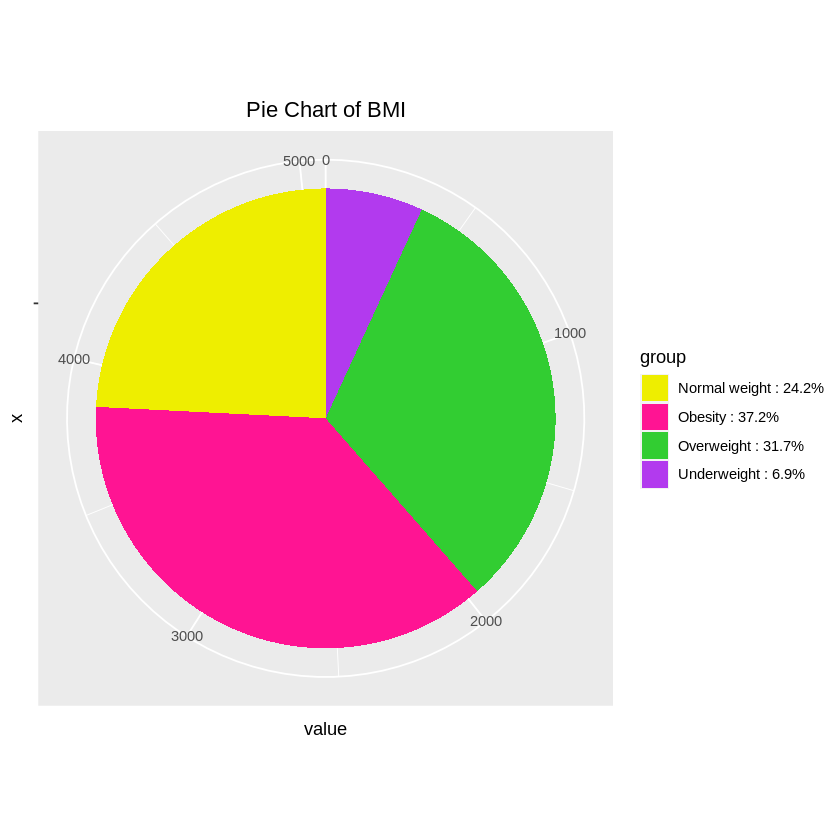

In [26]:
bmiGroups <- c(length(bmi[bmi <= 18.5]),
               length(bmi[bmi > 18.5 & bmi < 25]),
               length(bmi[bmi >= 25 & bmi < 30]),
               length(bmi[bmi > 30]))

bmiPercents <- round(100 * bmiGroups / sum(bmiGroups), 1)
bmiLabels = c("Underweight",
              "Normal weight",
              "Overweight",
              "Obesity")

data <- data.frame(group=paste0(bmiLabels, " : ", bmiPercents, "%"), value=bmiGroups)

bmiPie <- ggplot(data, aes(x="", y=value, fill=group)) 
bmiPie <- bmiPie + scale_fill_manual(values=c("yellow2", "deeppink", "limegreen", "darkorchid2"))
bmiPie <- bmiPie + geom_bar(stat="identity", width=1)
bmiPie <- bmiPie + coord_polar("y", start=0)
bmiPie <- bmiPie + ggtitle("Pie Chart of BMI")
bmiPie <- bmiPie + theme(plot.title = element_text(hjust = 0.5))
bmiPie

#### __Part H__
In this part, we will plot a box plot for **BMI** to find its parameters such as IQR, whiskers, and quartiles.

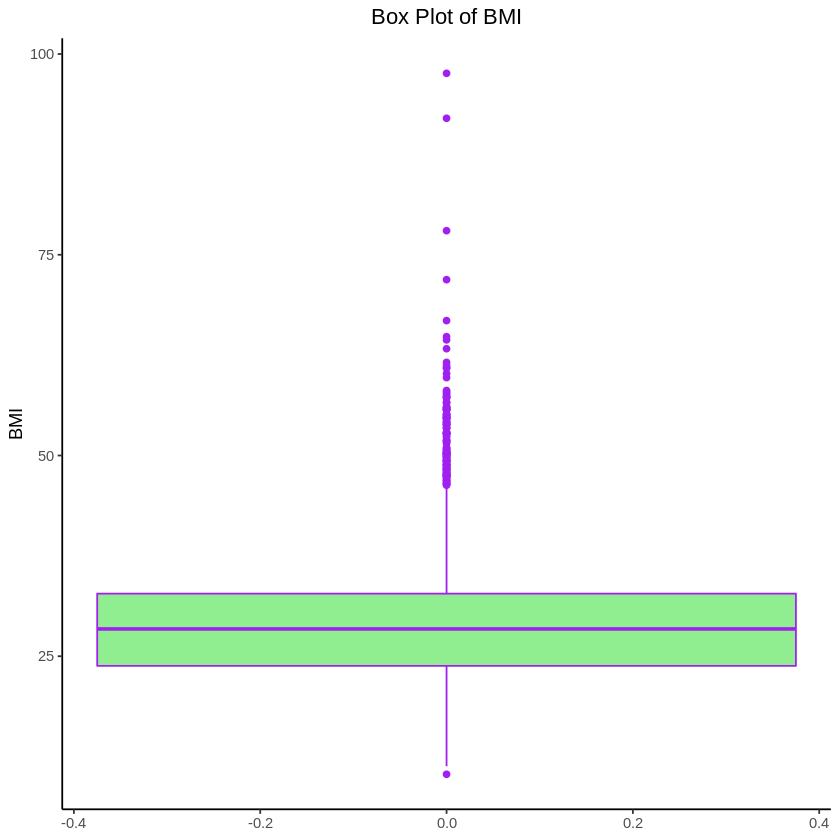

In [27]:
bmiBox <- ggplot(healthCare, aes(x = bmi)) 
bmiBox <- bmiBox + geom_boxplot(col="purple", fill="palegreen2")
bmiBox <- bmiBox + coord_flip()
bmiBox <- bmiBox + labs(x="BMI")
bmiBox <- bmiBox + ggtitle("Box Plot of BMI")
bmiBox <- bmiBox + theme_classic()
bmiBox <- bmiBox + theme(plot.title = element_text(hjust = 0.5))
bmiBox

By using a combination of `str()` and `boxplot.stats()` methods we can get the parameters of its boxplot. 

In [28]:
str(boxplot.stats(bmi))

List of 4
 $ stats: num [1:5] 11.3 23.8 28.4 32.8 46.2
 $ n    : int 5109
 $ conf : num [1:2] 28.2 28.6
 $ out  : num [1:126] 48.9 47.5 56.6 50.1 54.6 60.9 54.7 48.2 64.8 47.3 ...


Based on the result, we can obtain these parameters:


*   lower whisker = 11.3
*   upper whisker = 46.2
*   median = 28.4
*   1st-quartile = 23.8
*   3rd-quartile = 32.8

The difference between upper and lower whiskers shows the IQR of this boxplot. Also, we can compute it using `IQR()` method.



In [29]:
IQR(bmi)

[1] 9

### __Question 2__
In this question we choose **Smoking Status** feature as a categorical variable to perform following task with. Because it is one of the important factors that affects our health situation. So, it should be considered to predict health bills.

#### __Part A__
In this part, we will apply `table()` method to get frequency of each class in our categorical variable. Then, we convert it to a dataframe using `data.fram()` method. Finally we add percentage column to this dataframe.

In [30]:
smokingStatus <- healthCare$smoking_status
smokingStatusTable <- table(smokingStatus)
smokingStatusTable <- data.frame(smokingStatusTable)
smokingStatusTable$Percentage <- smokingStatusTable$Freq / sum(smokingStatusTable$Freq) * 100
smokingStatusTable

smokingStatus,Freq,Percentage
<fct>,<int>,<dbl>
formerly smoked,884,17.30280
never smoked,1892,37.03269
smokes,789,15.44334
Unknown,1544,30.22118


#### __Part B__
In this part, we will plot a bar plot for **Smoking Status**. We use different colors for each class by using fill. Moreover, by using `geom_text()` we can put percentage of each class on its bar.

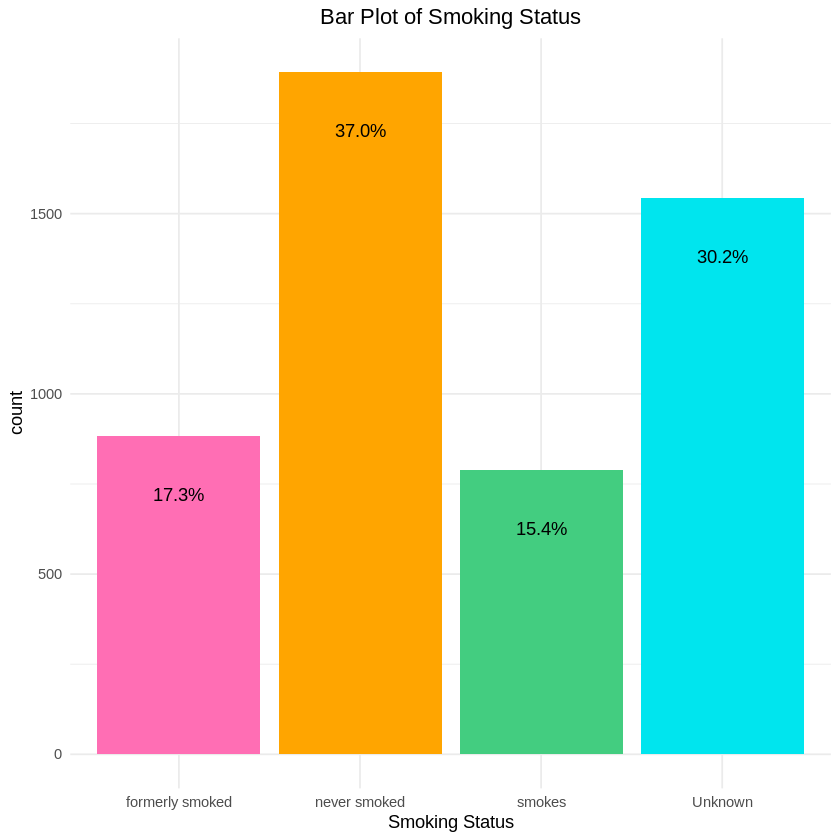

In [31]:
colors <- c("hotpink1", "orange", "seagreen3", "turquoise2")

smokingStatusBar <- ggplot(data=healthCare, aes(x=smoking_status))
smokingStatusBar <- smokingStatusBar + geom_bar(fill = colors)
smokingStatusBar <- smokingStatusBar + geom_text(aes(label = scales::percent(..count../sum(..count..)), y= ..count.. ), 
                                                  stat= "count", vjust = 5)
smokingStatusBar <- smokingStatusBar + ggtitle("Bar Plot of Smoking Status")
smokingStatusBar <- smokingStatusBar + theme_minimal()
smokingStatusBar <- smokingStatusBar + labs(x="Smoking Status")
smokingStatusBar <- smokingStatusBar + theme(plot.title = element_text(hjust = 0.5))
smokingStatusBar

#### __Part C__
In this part, we want to sort bars of the previous plot and draw it horizontally. At first, we sort our dataset based on classes of **Smoking Status** and store it in a new dataframe. Finally, we use this new datafrane to plot the bar plot. We use `coord_flip()` to make it horizontal.

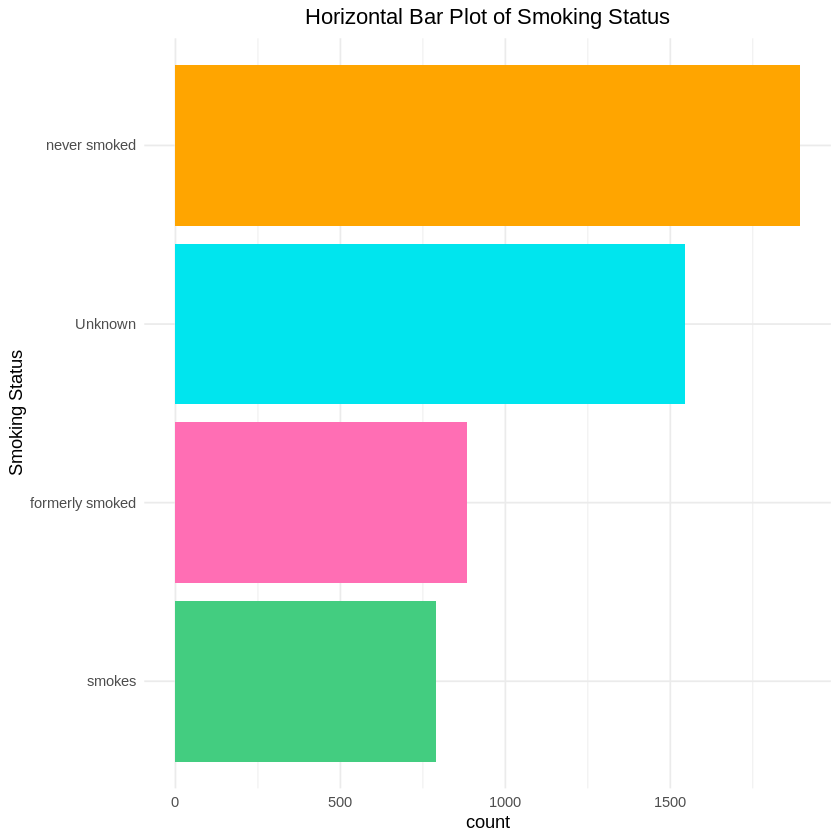

In [32]:
colors <- c("seagreen3", "hotpink1", "turquoise2", "orange")

sortedSmokingStatus <- within(healthCare,
                        smoking_status <- factor(
                                smoking_status,
                                levels=names(sort(table(smoking_status),
                                decreasing=FALSE))))

SmokingStatusBarH <- ggplot(data=sortedSmokingStatus, aes(smoking_status))
SmokingStatusBarH <- SmokingStatusBarH + geom_bar(fill=colors)
SmokingStatusBarH <- SmokingStatusBarH + theme_minimal()
SmokingStatusBarH <- SmokingStatusBarH + ggtitle("Horizontal Bar Plot of Smoking Status")
SmokingStatusBarH <- SmokingStatusBarH + labs(x="Smoking Status")
SmokingStatusBarH <- SmokingStatusBarH + theme(plot.title = element_text(hjust = 0.5))
SmokingStatusBarH <- SmokingStatusBarH + coord_flip()
SmokingStatusBarH

#### __Part D__
In this part, we will draw violin plot for **Smoking Status**. Also, we have to chose another column to be able to draw this plot. As we mentioned before, **Health Bills** is our taget column that we want to predict it. So, we choose this column as the second variable for out violin plot.

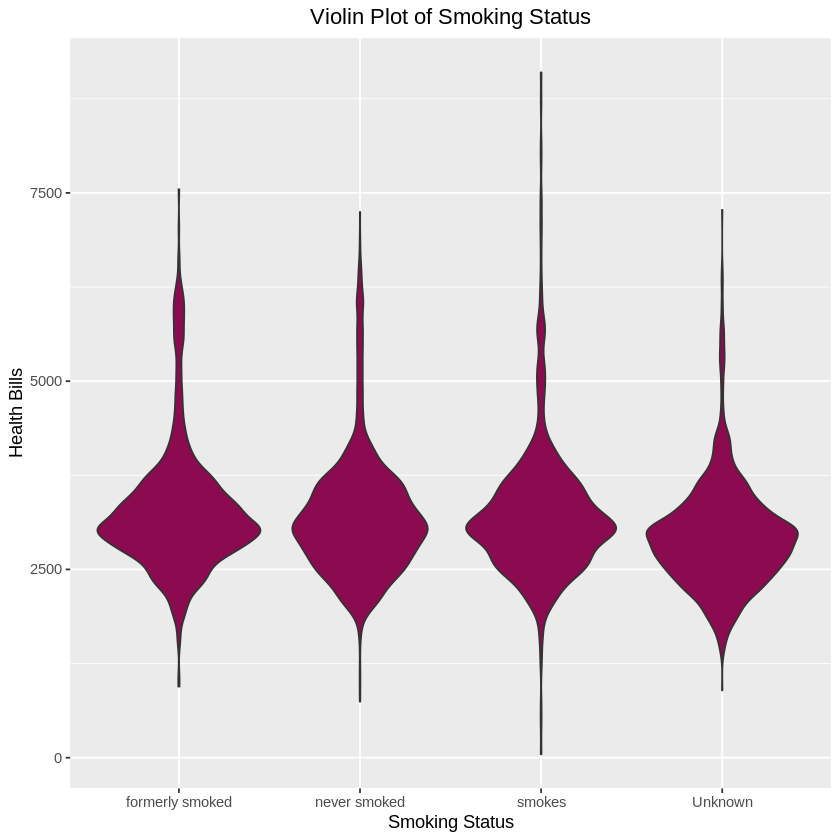

In [33]:
smokingStatusViolin <- ggplot(healthCare, aes(x=smoking_status, y=health_bills))
smokingStatusViolin <- smokingStatusViolin + geom_violin(fill = "deeppink4")
smokingStatusViolin <- smokingStatusViolin + ggtitle("Violin Plot of Smoking Status")
smokingStatusViolin <- smokingStatusViolin + labs(x="Smoking Status", y="Health Bills")
smokingStatusViolin <- smokingStatusViolin + theme(plot.title = element_text(hjust = 0.5))
smokingStatusViolin

### __Question 3__
In this question, we choose **BMI** and **Health Bills** to perform following tasks with.

#### __Part A__
It is undeniable that being underweight or obesity can increase the risk of different types of disease for individuals. As the risk of diseases increases, the health bills that we should pay increases.

#### __Part B__
In this part, we draw scatter plot for these two variables. This is done by using `geom_point()` method from *ggplot* library.

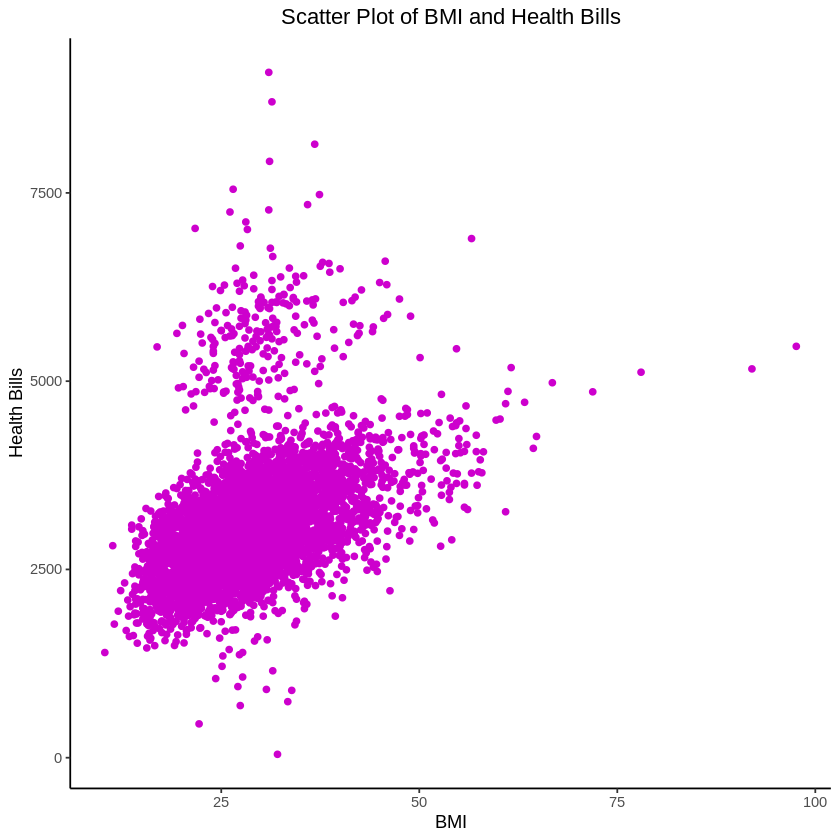

In [34]:
scatter <- ggplot(healthCare, aes(x=bmi, y=health_bills)) 
scatter <- scatter + geom_point(color="magenta3")
scatter <- scatter + theme_classic()
scatter <- scatter + ggtitle("Scatter Plot of BMI and Health Bills")
scatter <- scatter + labs(x="BMI", y="Health Bills")
scatter <- scatter + theme(plot.title = element_text(hjust = 0.5))
scatter

Based on the result, it seems that there might be an association between these two variables. The data show an uphill pattern as we move from left to right, this indicates a positive relationship between them. As the BMI increase (move right), the health bills tend to increase (move up).

#### __Part C__
In this part, we compute the correlation coefficient betwwn these two variables using `cor()` method. By default it uses *pearson* method.

In [35]:
healthBills <- healthCare$health_bills
cor(bmi, healthBills)

[1] 0.422437

#### __Part D__
Based on the computed correlation, it seems that these two variable are not independent and there is a positive association between them. This result is in good agreement with the answer of part A.

#### __Part E__
In this part, we use `cor.test()` method to run correlation test between these two variables. 

In [36]:
cor.test(formula = ~ bmi + health_bills, data = healthCare)


	Pearson's product-moment correlation

data:  bmi and health_bills
t = 33.306, df = 5107, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3996445 0.4447075
sample estimates:
     cor 
0.422437 


Based on the result, these two variables are correlated to each other. p-value = 2.2e-16 means these two variables are not independent (with the correlation equals to 0.4225391).

#### __Part F__
In this part, we choose **Smoking Status** as a categorical variable that we used in question 2. We assumed that it is one of the important factors which might have effect on **Health Bills**.

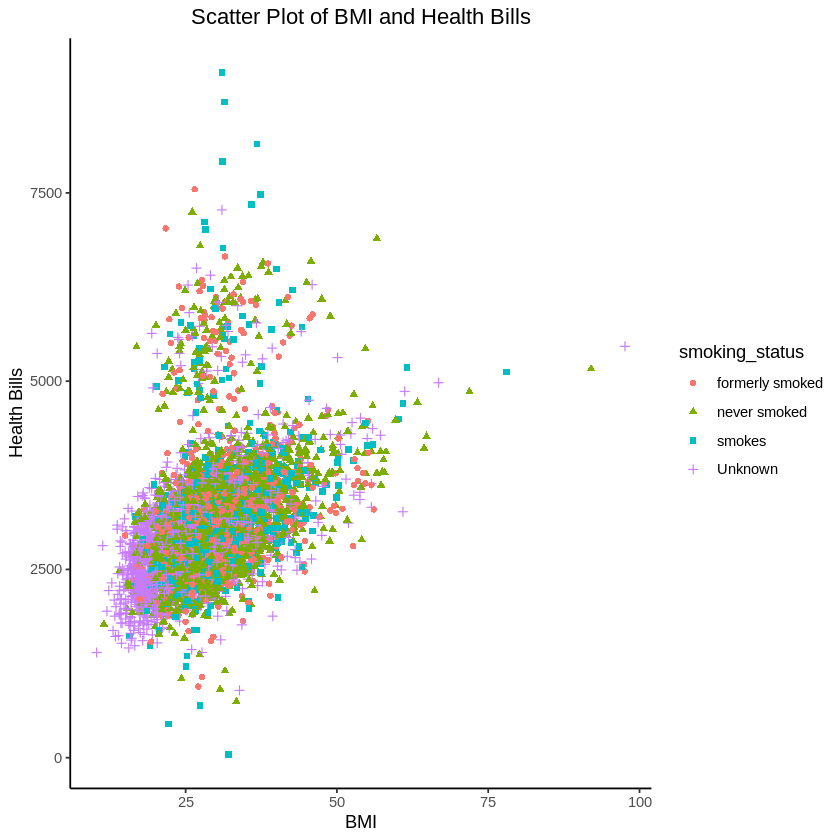

In [37]:
scatter <- ggplot(healthCare, aes(x=bmi, y=health_bills, shape=smoking_status, color=smoking_status)) 
scatter <- scatter + geom_point()
scatter <- scatter + theme_classic()
scatter <- scatter + ggtitle("Scatter Plot of BMI and Health Bills")
scatter <- scatter + labs(x="BMI", y="Health Bills")
scatter <- scatter + theme(plot.title = element_text(hjust = 0.5))
scatter

Based on the result, our assumption in this part was not completely wrong and we can separate data based on **Smoking Status**.

#### __Part G__
In this part we use `geom_hex()` method to draw hexbin plot. Then, we use `geom_smooth()` to draw fitting curve. Finally we use `ggMarginal()` method to draw marginal histograms.
*   It should be large enough to have data in most of the shapes.
*   It should be small enough to allow us to start to see any relevant patterns.

In [38]:
hexBin <- ggplot(healthCare, aes(bmi, healthBills))
hexBin <- hexBin + theme_classic()
hexBin <- hexBin + scale_fill_gradient(low =  "palevioletred1", high = "palevioletred4") 
hexBin <- hexBin + ggtitle("Hex Bin Plot of BMI and Health Bills")
hexBin <- hexBin + labs(x="BMI", y="Health Bills")
hexBin <- hexBin + theme(plot.title = element_text(hjust = 0.5))
hexBin <- hexBin + geom_point(col="transparent")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



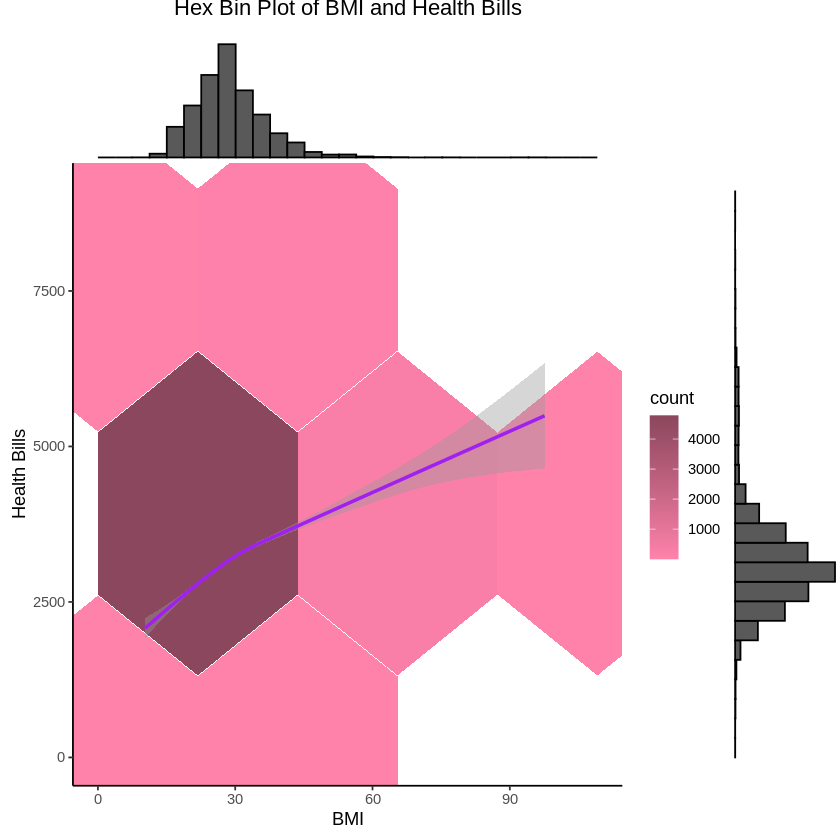

In [39]:
hexBin2 <- hexBin + geom_hex(bins=2)
hexBin2 <- hexBin2 + geom_smooth(col="purple") 
ggMarginal(hexBin2, type = "histogram")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



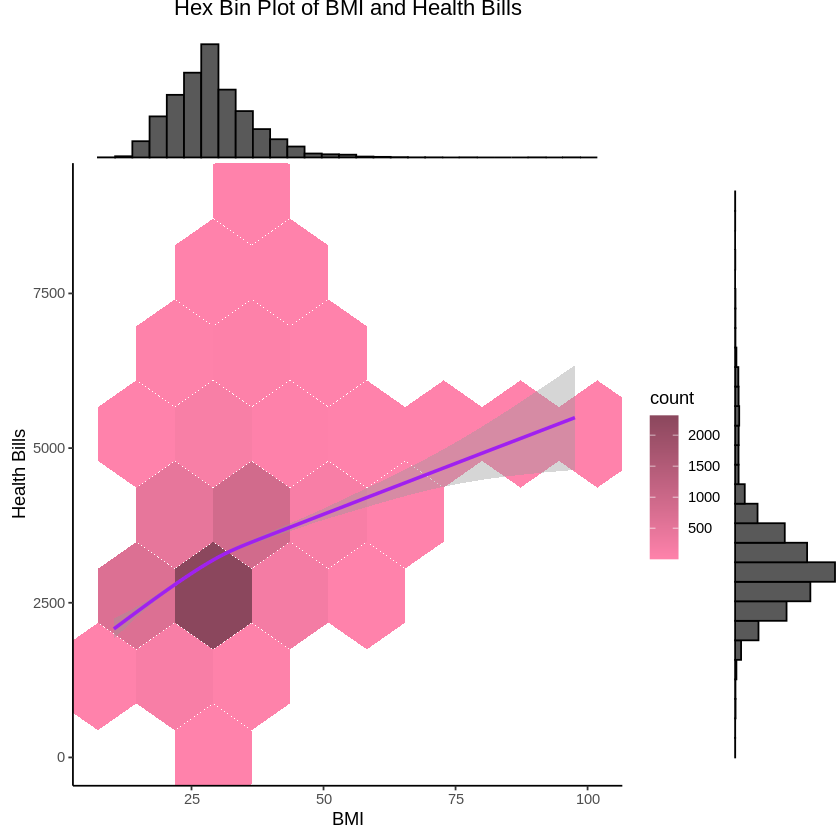

In [40]:
hexBin5 <- hexBin + geom_hex(bins=6)
hexBin5 <- hexBin5 + geom_smooth(col="purple") 
ggMarginal(hexBin5, type = "histogram")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



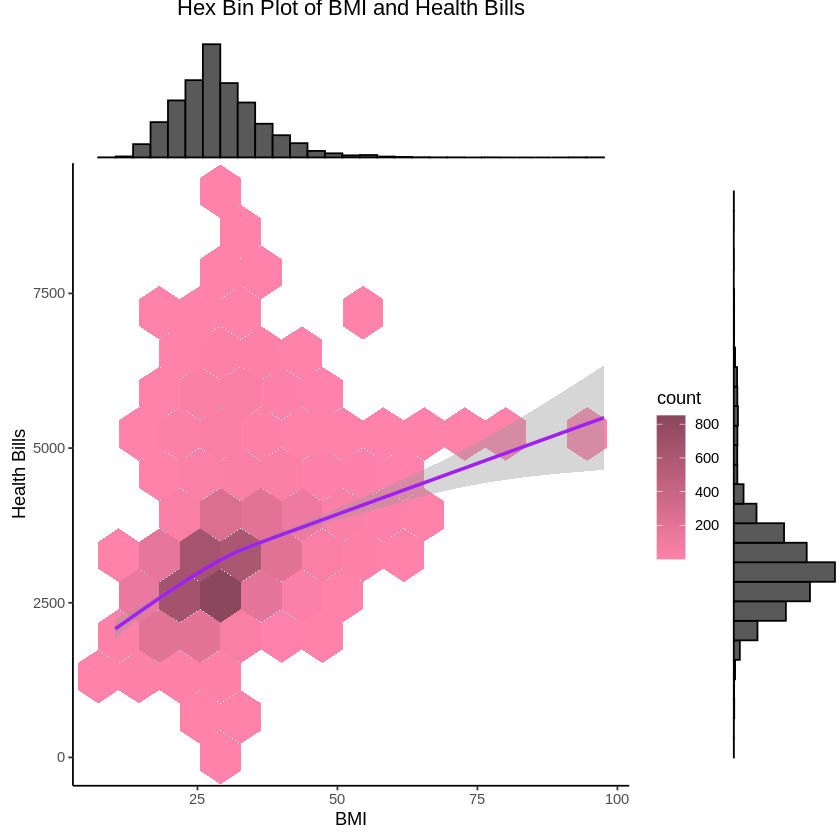

In [41]:
hexBin8 <- hexBin + geom_hex(bins=12)
hexBin8 <- hexBin8 + geom_smooth(col="purple") 
ggMarginal(hexBin8, type = "histogram")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



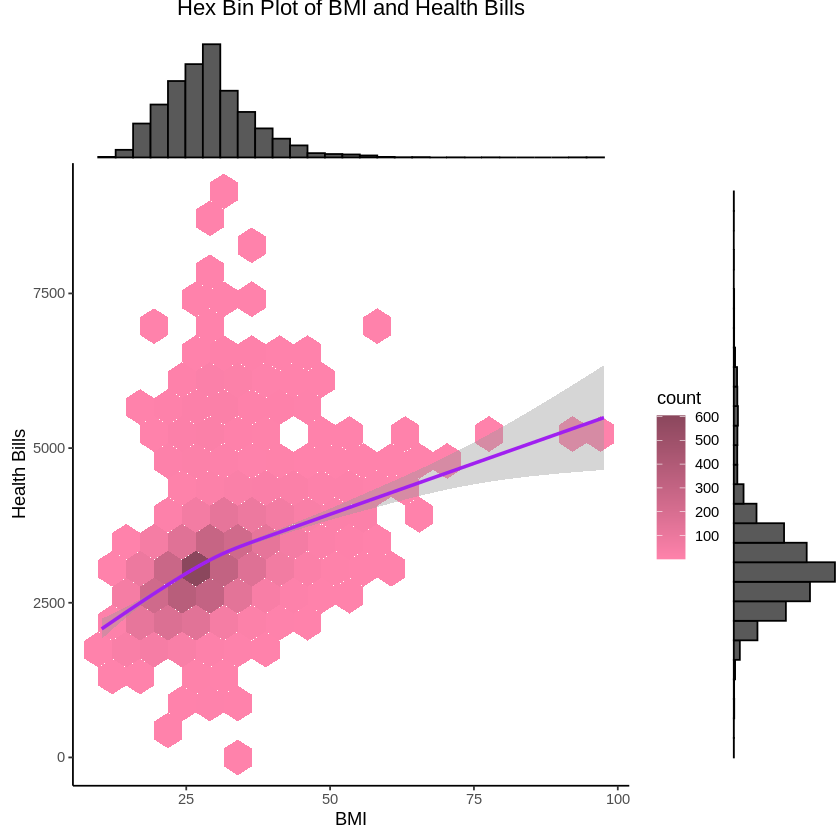

In [42]:
hexBin8 <- hexBin + geom_hex(bins=18)
hexBin8 <- hexBin8 + geom_smooth(col="purple") 
ggMarginal(hexBin8, type = "histogram")

Based on the result, a large portion of data is located at **BMI** around 27 and **Health Bills** less than 2800.

Moreover, we see that by decreasing the bin size it composed a larger amount of samples with each other. It seems that 6 and 12 are good size for bins and we can get good information from the variables by using them.

#### __Part H__
In this part, we use `stat_density_2d()` method to draw 2D density plot of these two variables.

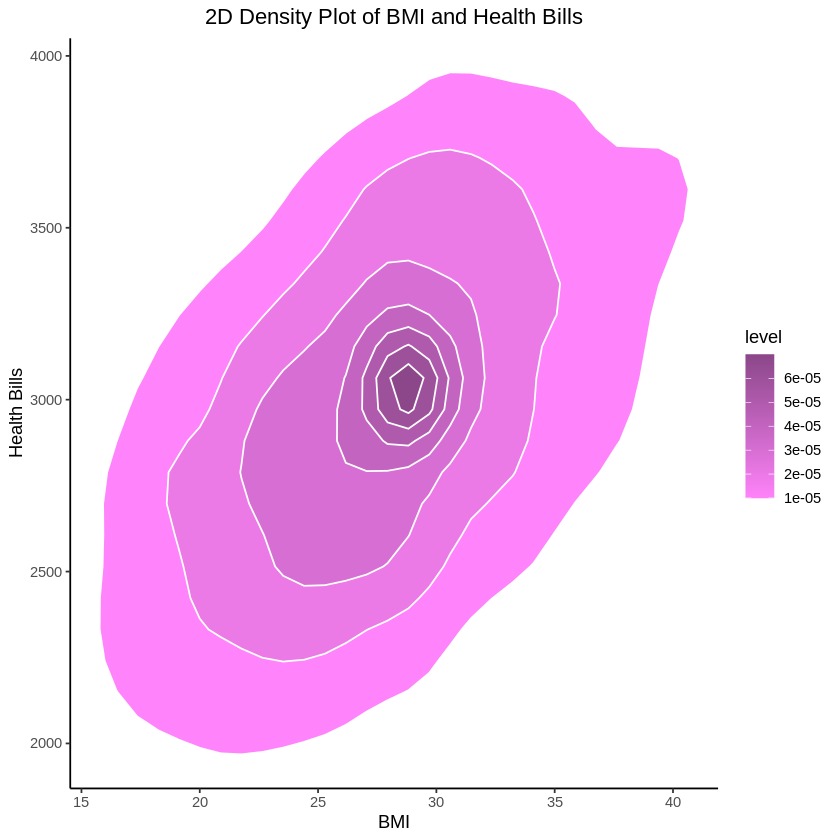

In [43]:
density2D <- ggplot(healthCare, aes(x=bmi, y=healthBills)) 
density2D <- density2D + stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white")
density2D <- density2D + theme_classic()
density2D <- density2D + scale_fill_gradient(low =  "orchid1", high = "orchid4") 
density2D <- density2D + ggtitle("2D Density Plot of BMI and Health Bills")
density2D <- density2D + labs(x="BMI", y="Health Bills")
density2D <- density2D + theme(plot.title = element_text(hjust = 0.5))
density2D

Based on the result, it is in a good agreement with the result of last part.

##### __Advantages & Disadvantages of 2D Density & Hexbin__
If we want to draw a scatter plot for a huge dataset, our result would be like a messy dark blob in the center with a smattering of distinguishable points around its surrounding. Therefore it is not very informative. In this situation **Hexbin** can be more useful. It automatically returns values using a color gradient for density. 

2D density plot is very useful to avoid overplotting in a scatterplot. 

As a disadvantage, if we do not select the bin size carefully, it may generate some uninformative results. Sometimes these results may have too much information that we can not obtain an abstract view from data and sometime we can not gain any information.

### __Question 4__
In this question, we consider **Age**, **Average Glucose Level**, **BMI**, and **Health Bills** as a group of 4 numerical variables.

#### __Part A__
In this part, we will use `ggpairs()` method from *GGally* library to plot pairwise scatterplots. This method allows us to build a great scatterplot matrix. Scatterplots of each pair of numeric variable are drawn on the left part of the figure. Pearson correlation is displayed on the right. Variable distribution is available on the diagonal.

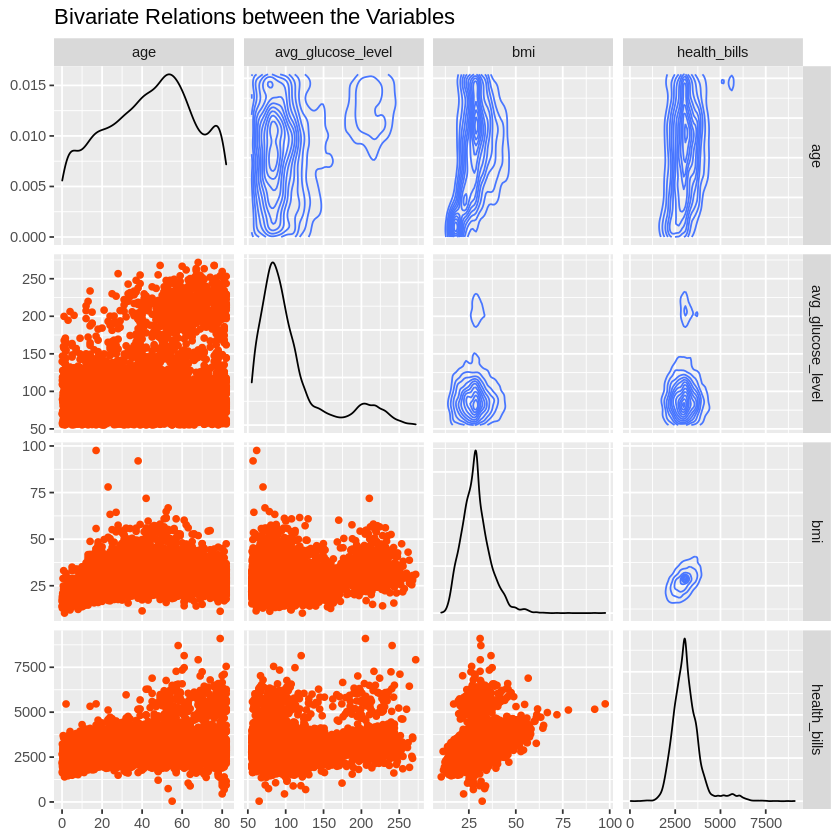

In [44]:
ggpairs(healthCare[c("age", "avg_glucose_level", "bmi", "health_bills")],
 title="Bivariate Relations between the Variables ", 
 lower=list(coreSize=10, continuous = wrap("points", color= "orangered")),
 upper=list(coreSize=10, continuous = wrap("density", color= "royalblue1")))

Based on the result, we can conclude that **BMI** is the most correlated variable to **Health Bills** among the numerical variables. This is a confirmation for our assumptions in previous part.

Moreover, **Age** is somehow correlated with **BMI** and there is a positive association between them.

#### __Part B__
In this part, we use `ggcorrplot()` from *ggcorrplot* library to plot to create a heatmap correlogram from our features. Also, we use `cor_pmat()` method to compute matrix of p-value. Finally, we set the significance level to 0.05.

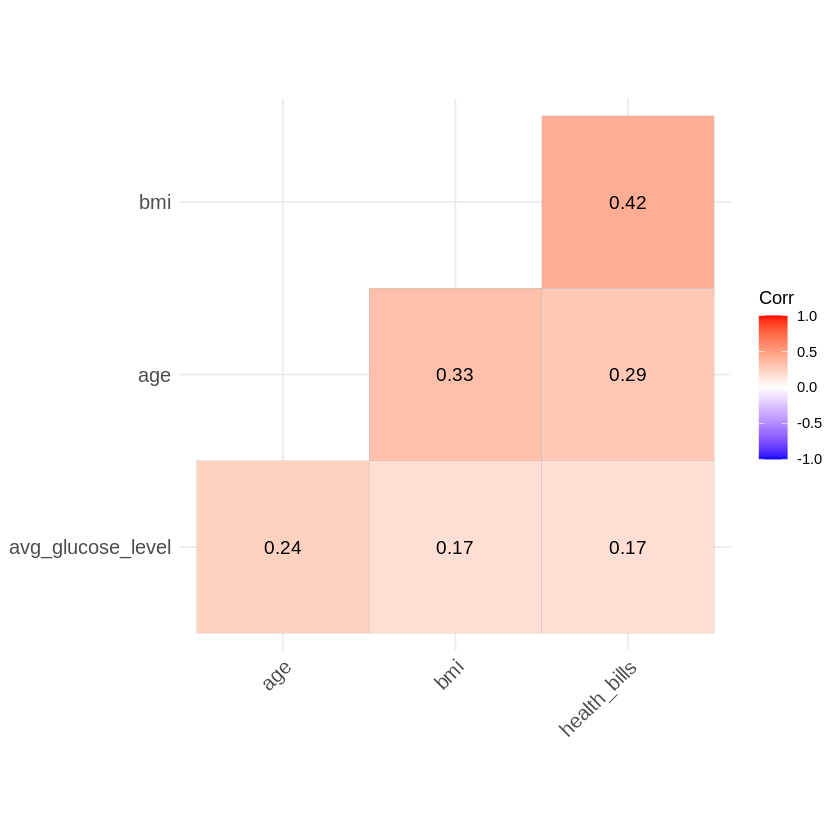

In [45]:
numericVars <- healthCare[c("age", "avg_glucose_level", "bmi", "health_bills")]
corr <- cor(numericVars)
p.mat <- cor_pmat(numericVars)
ggcorrplot(corr, hc.order = TRUE, type = "lower", lab = TRUE, p.mat = p.mat, sig.level = 0.05)

In [46]:
p.mat

,age,avg_glucose_level,bmi,health_bills
age,0.000000e+00,6.647636e-67,1.108772e-126,1.387186e-102
avg_glucose_level,6.647636e-67,0.000000e+00,5.205739e-34,1.242458e-34
bmi,1.108772e-126,5.205739e-34,0.000000e+00,2.725930e-220
health_bills,1.387186e-102,1.242458e-34,2.725930e-220,0.000000e+00


Based on the result, the highest correlation is between **BMI** and **Health Bills** that wew discussed in previous parts.

#### __Part C__
In this part, we use `scatterplot3d()` method from *scatterplot3d* library to draw 3D scatterplot for our dataset. We choose **BMI**, **Age**, and **Health Bills** as three numerical variables. Also, we choose **Smoking Status** as a categorical variable for coloring of the plot.

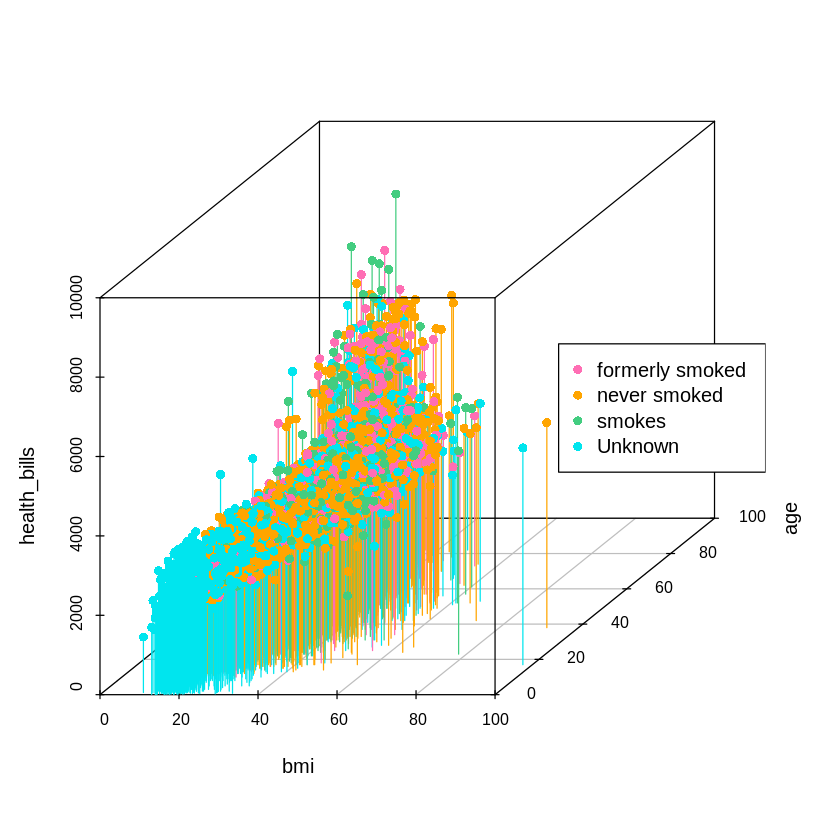

In [47]:
colors <- c("hotpink1", "orange", "seagreen3", "turquoise2")
smokingFactor <- factor(healthCare$smoking_status)
colors <- colors[as.numeric(smokingFactor)]
scatter3D <- scatterplot3d(healthCare[c("bmi", "age", "health_bills")],
                pch = 16, color=colors, type="h")
legend("right", legend = levels(smokingFactor), 
      col = c("hotpink1", "orange", "seagreen3", "turquoise2"), pch = 16)

Based on the result, **Smoking Status** can separate data points into groups. Moreover, it shows that people who smoke should pay more for their health bills.

### __Question 5__

#### __Part A__
A contingency is a tabular mechanism with at least two rows and two columns used in statistics to present categorical data in terms of frequency counts. 

For this chart, we consider **Gender** and **Smoking Status** featuresa of our dataset.
We use `table()` method to get the contingency table of these two variables. Also, we use `addmargins()` method to row and column for sum.

In [48]:
tableColors <- c("red", "red","red","red")
contingencyTable <- table(healthCare$gender, healthCare$smoking_status)
addmargins(contingencyTable)

,formerly smoked,never smoked,smokes,Unknown,Sum
Female,477,1229,452,836,2994
Male,407,663,337,708,2115
Sum,884,1892,789,1544,5109


#### __Part B__
A grouped bar chart extends the bar chart, plotting numeric values for levels of two categorical variables instead of one. Bars are grouped by position for levels of one categorical variable, with color indicating the secondary category level within each group.

For this chart, we consider **Gender** and **Smoking Status** featuresa of our dataset. We use `geom_bar()` method with dodge position to draw this plot.

`summarise()` has grouped output by 'smoking_status'. You can override using the `.groups` argument.



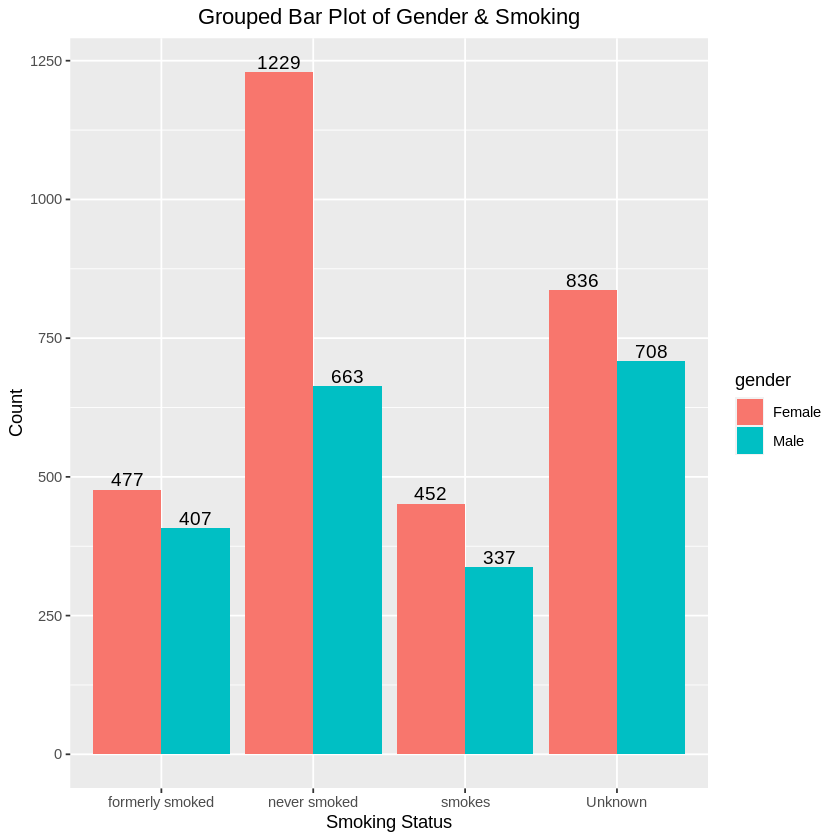

In [49]:
barData <- healthCare %>% group_by(smoking_status, gender) %>% summarise(Count=n())

groupedBar <- ggplot(barData, aes(fill=gender, y=Count, x=smoking_status)) 
groupedBar <- groupedBar + geom_bar(position="dodge", stat="identity") 
groupedBar <- groupedBar + geom_text(aes(label=Count), position = position_dodge(width = 0.9), 
                vjust = -0.25, size = 4)
groupedBar <- groupedBar + ggtitle("Grouped Bar Plot of Gender & Smoking") 
groupedBar <- groupedBar + xlab("Smoking Status")
groupedBar <- groupedBar + theme(plot.title = element_text(hjust = 0.5))       
groupedBar        

#### __Part C__
A segmented Bar chart is one kind of stacked bar chart, but each bar will show 100% of the discrete value. 

For this chart, we consider **Gender** and **Smoking Status** featuresa of our dataset. We use `geom_bar()` method with stack position to draw this plot.

`summarise()` has grouped output by 'smoking_status'. You can override using the `.groups` argument.



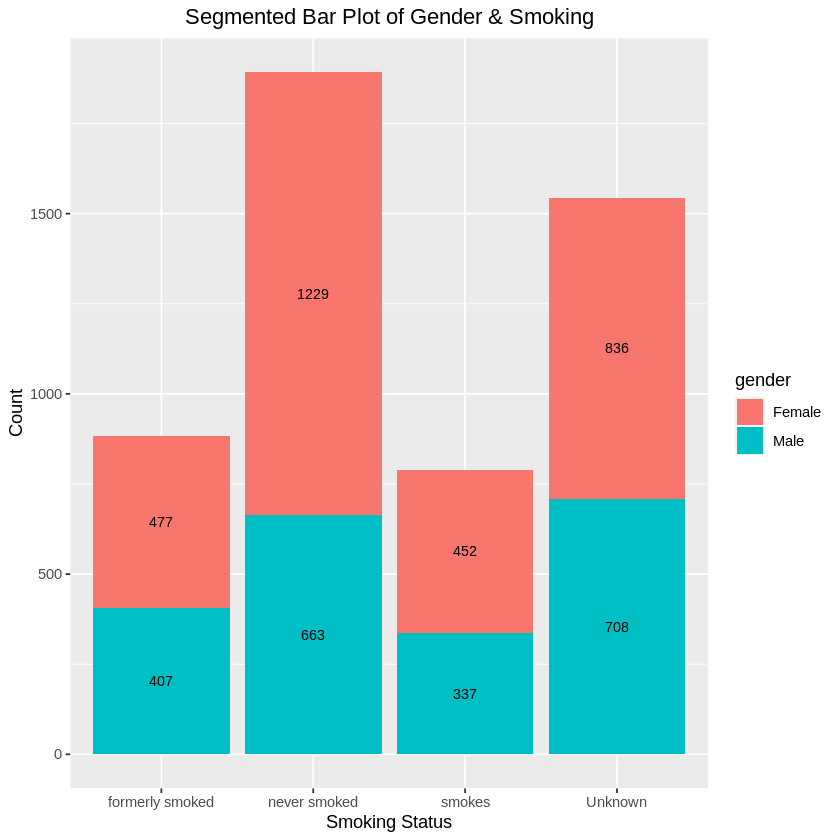

In [50]:
barData <- healthCare %>% group_by(smoking_status, gender) %>% summarise(Count=n())

segmentedBar <- ggplot(barData, aes(fill=gender, y=Count, x=smoking_status)) 
segmentedBar <- segmentedBar + geom_bar(stat="identity") 
segmentedBar <- segmentedBar + geom_text(size = 3, aes(label=Count), 
                              position = position_stack(vjust = 0.5))
segmentedBar <- segmentedBar + ggtitle("Segmented Bar Plot of Gender & Smoking") 
segmentedBar <- segmentedBar + xlab("Smoking Status")
segmentedBar <- segmentedBar + theme(plot.title = element_text(hjust = 0.5))       
segmentedBar 

#### __Part D__
A mosaic plot is a graphical display that allows you to examine the relationship among two or more categorical variables.

The mosaic plot starts as a square with length one. The square is divided first into horizontal bars whose 
widths are proportional to the probabilities associated with the first categorical variable. Then each bar is 
split vertically into bars that are proportional to the conditional probabilities of the second categorical 
variable. Additional splits can be made if wanted using a third, fourth variable, etc

For this chart, we consider **Gender** and **Smoking Status** featuresa of our dataset. We use `facet_grid()` method to draw this plot.

`summarise()` has grouped output by 'smoking_status'. You can override using the `.groups` argument.



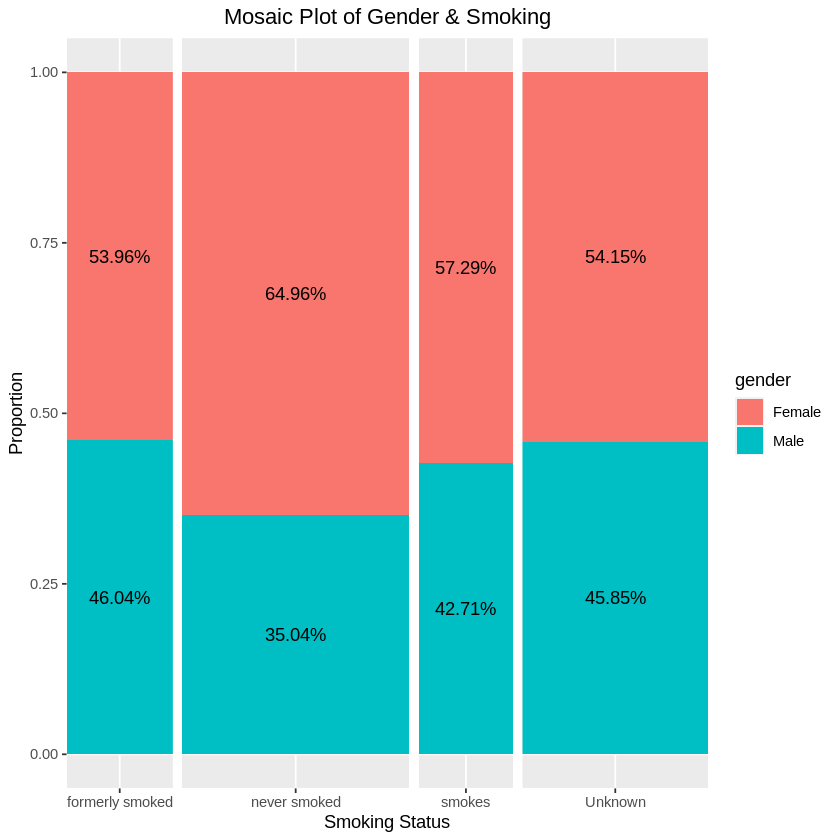

In [51]:
mosaicData <- healthCare %>%
group_by(smoking_status, gender) %>%
summarise(count = n()) %>%
mutate(smoking_status.count = sum(count),
        prop = count/sum(count)) %>%
ungroup()

mosaicPlot <- ggplot(mosaicData, aes(x = smoking_status, y = prop, 
                      width = smoking_status.count, fill = gender))
mosaicPlot <- mosaicPlot + geom_bar(stat = "identity")
mosaicPlot <- mosaicPlot + geom_text(aes(label = scales::percent(prop)), 
                                    position = position_stack(vjust = 0.5))
mosaicPlot <- mosaicPlot + facet_grid(~smoking_status, scales = "free_x", space = "free_x")
mosaicPlot <- mosaicPlot + ggtitle("Mosaic Plot of Gender & Smoking") 
mosaicPlot <- mosaicPlot + xlab("Smoking Status")
mosaicPlot <- mosaicPlot + ylab("Proportion")
mosaicPlot <- mosaicPlot + theme(plot.title = element_text(hjust = 0.5),
                                  strip.background = element_blank(),
                                  strip.text.x = element_blank()) 
 
mosaicPlot

### __Question 6__
As we mentioned in previous questions, our target variable is **Health Bills** and we are interested to predict it in future. So, we choose it for this question to perform following tasks on it.

#### __Part A__
In this part, we want to build a 95% confidence interval for the mean of **Health Bills**. At the first step, we compute and store some statistics that we need in the calculation of confidence interval. Moreover, we take a sample from the data of size 100. 

In [52]:
billPopulation <- healthCare$health_bills
sampleSize <- 100
set.seed(2)
billSampleIndex <- sample(1:nrow(healthCare), sampleSize)
billSample <- healthCare[c("health_bills")][billSampleIndex, ]
sampleMean <- mean(billSample)
sampleMean

[1] 3034.021

Now it is time to compute lower and upper bounds of confident interval.

$$\bar{x} \pm z^{*} \frac{s}{\sqrt{n}}$$

#####__Conditions for Confidence Interval__


1.   **Independence:** As we used random sampling and the size of the sample (100) is less than 10% of the population, we can conclude that this condition is satisfied.
2.   **Sample size/skew:** Size of the sample is greater than 30 and our population is not skewed. So, we met this condition.




In [53]:
sampleMean <- mean(billSample)
populationSd <- sd(billPopulation)

SE <- populationSd / sqrt(sampleSize)

ME <- qnorm(0.975) * SE

low <- sampleMean - ME
up <- sampleMean + ME

print(paste("the 95% CI=(",low,"up to ",up,")"), quote = FALSE)

[1] the 95% CI=( 2875.53291146154 up to  3192.50970844987 )


#### __Part B__
We are 95% confident that the mean health bills for all individuals in the given population is somewhere between 2856.15 and 3173.14.

#### __Part C__
In this part, we use `geom_vline()` method from *ggplot* library to add mean and lower and upper bounds of confidence interval to our histogram. We draw them with different colors and also define a legend for them.


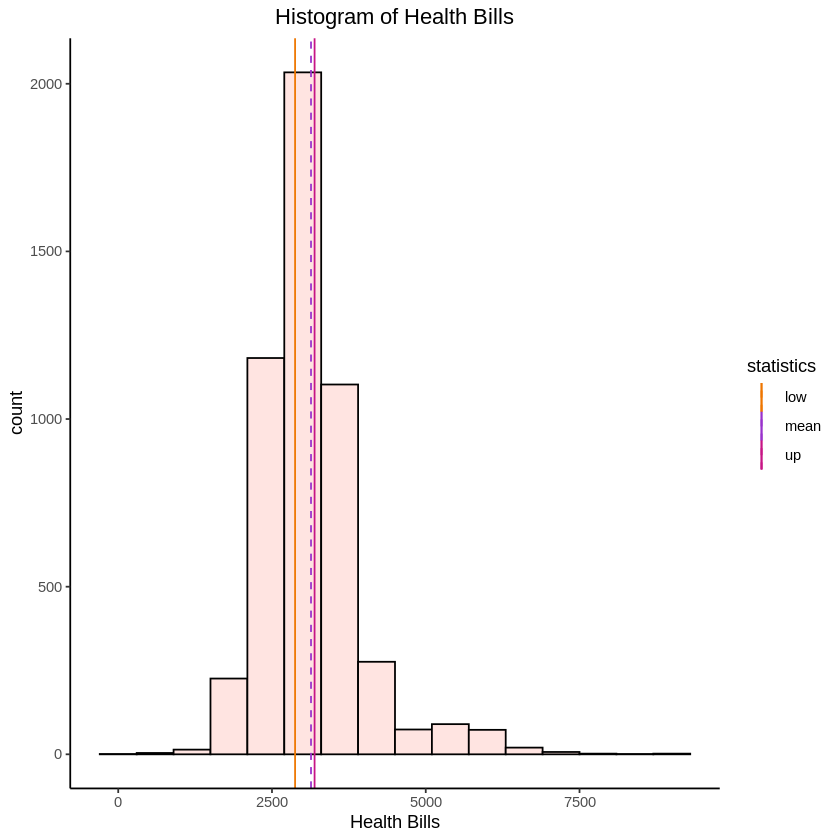

In [54]:
billData <- healthCare %>%
  summarize(mean = mean(health_bills),
            up = up,
            low = low)

binwidth <- 600
billHist <- ggplot(healthCare, aes(x=health_bills)) 
billHist <- billHist + geom_histogram(fill ="mistyrose", colour="black", binwidth = binwidth) 
billHist <- billHist + geom_vline(data = billData, aes(xintercept = low, color = "low"))
billHist <- billHist + geom_vline(data = billData, aes(xintercept = up, color = "up"))
billHist <- billHist + geom_vline(data = billData, aes(xintercept = mean, , color = "mean"),
                                                            linetype = "dashed")
billHist <- billHist + scale_color_manual(name = "statistics", 
                  values = c(mean = "darkorchid", low = "darkorange2", up = "mediumvioletred"))                                                           
billHist <- billHist + xlab("Health Bills")
billHist <- billHist + ggtitle("Histogram of Health Bills")
billHist <- billHist + theme_classic()
billHist <- billHist + theme(plot.title = element_text(hjust = 0.5))
billHist

#### __Part D__
In this part, the question that we design and want to answer is as follows:


*Do individuals pay on average have paid more than 3000 for their health bills?*


To answer this question, we statethe null and alternative hypotheses.



$\begin{cases}
    H_0: \mu = 3000\\
    H_A: \mu > 3000
\end{cases} $


Now we compute the p-value based on the statistic that we find in last part.

In [55]:
mu_0 <- 3000
#test statistics 
z <- (sampleMean - mu_0) / SE
p_value <- pnorm(z, lower.tail = FALSE)
p_value

[1] 0.3369768

$$p-value = 0.337 > 0.05 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills is greater than 3000.

#### __Part E__
Yes. null hypothesis (3000) is within the confidence interval. So, we fail to reject null hypothesis. In other words, the data do not support the hypothesis that the mean of health bills is greater than 3000.

#### __Part F__
In this part, we want to calculate type 2 error.


$$ \beta = P(\text{Fail to reject } H_0|\mu = \mu_a)$$

$$Power = 1 - \beta$$

Based on the above formulas, we can compute the power at the first step and then subtract it from 1 to obtain type 2 error.


In [56]:
actualMean <- mean(billPopulation)
alpha <- 0.05
zAlpha <- qnorm(alpha, lower.tail = FALSE)
zStatistics <- ((SE * zAlpha + mu_0) - actualMean) / SE
power <- pnorm(zStatistics, lower.tail = FALSE)
beta <- 1 - power
beta

[1] 0.4922599

We can see that type 2 error is about 49.23%. In other words, the probabilty that we fail to reject null hypothesis given that it null hypothesis is false is 0.4923. 

#### __Part G__


In [57]:
power

[1] 0.5077401

We compute it in last part and it is 50.77%. Power is the probability of correctly rejecting null hypothesis,

The effect size tells us something about how relevant the relationship between two variables 
is in practice. There are two types of effect sizes:
*  Effect size based on the proportion of explained variance: the proportion of explained 
variance is often indicated by one of the following terms: R² or eta squared, partial 
eta squared or omega squared. These forms are discussed later in the summary.
*  Effect size based on the difference in averages. This is often referred to using Cohen's 
d.

The statistical power of a significance test depends 3 factors:
* The sample size (n): when n increases, the power increases;
* The significance level (α): when α increases, the power increases;
* The effect size (explained below): when the effect size increases, the power 
increases.

### __Question 7__

#### __Part A__
In this part, we take a sample of size 25 from the data and then we perform following tasks on it.


In [58]:
sampleSize = 25
set.seed(123)
index <- sample(1:nrow(healthCare), sampleSize)
pairSample = healthCare[c("bmi", "age")][index, ]

##### __Part a__
Here, we will use t-test because the sample size is less than 30 and we can not meet the condition of sample size for z-test. 

As we used randome sampling and the sample size is less than the 10% of population, the indepence condtion of t-test is satisfied and we can use it for this task.


##### __Part b__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{diff} = 0$$


$$H_A: \mu_{diff} \neq 0$$


Average difference between the **Age** and **BMI** of all individuals in our population.

We have to mention that these two sample (age & bmi) are paired. So, they are dependent and we have to look at the difference in outcomes of each
pair of observations and then run the t-test on it.



In [59]:
diff <- pairSample$age - pairSample$bmi
t.test(diff, mu = 0)


	One Sample t-test

data:  diff
t = 2.3996, df = 24, p-value = 0.02453
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  1.421751 18.901449
sample estimates:
mean of x 
  10.1616 


$$p-value = 0.024 < 0.05 \implies$$

We reject null hypothesis and conclude that there is significant evidence in the average of difference between the **Age** and **BMI**. And their difference is not equal to zero.

#### __Part B__
In this part, the two samples are independent. So, we have the codition of indepence between and within groups. Therefore, we can run t-test on these two groups.

Our hypotheses for this part are as follows:


$$H_0: \mu_{age} = \mu_{bmi}$$


$$H_A: \mu_{age} \neq \mu_{bmi}$$


Firstly, we take the two samples from the poulation. One sample for **Age** and another sample for **BMI**.

In [60]:
sampleSize = 100
set.seed(123)
ageSampleIndex <- sample(1:nrow(healthCare), sampleSize)
bmiSampleIndex <- sample(1:nrow(healthCare), sampleSize)

ageSample <- healthCare[c("age")][ageSampleIndex, ]
bmiSample <- healthCare[c("bmi")][bmiSampleIndex, ]

Now it is time to run t-test on these groups.

In [61]:
t.test(ageSample, bmiSample)


	Welch Two Sample t-test

data:  ageSample and bmiSample
t = 5.4366, df = 127.96, p-value = 2.649e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8.349213 17.904313
sample estimates:
mean of x mean of y 
 43.52760  30.40084 


$$p-value = 2.65e^{-7} < 0.05 \implies$$

We reject null hypothesis and conclude that there is significant evidence in the mean drop in **Age** and **BMI** groups.

As we can see, zero is not in the 95% confidence interval. Therefor we reject the null hypothesis. This is the same as what we obtained by using the p-value. This two methods are always in agreement with each other.

### __Question 8__
In this question, we choose **BMI** as a numerical variable to do following tasks with.

#### __Part A__
In this part, we will compute a 95% confidence interval for the mean of this variable using percentile method. At first, we take 1000 samples of size 100 from the population without replacement. Then we compute the lower and upper bound of this interval as follows.

In [62]:
bmi = healthCare$bmi
CI = 0.95
sampleSize = 100
numBootSamples = 1000
set.seed(4)
boot <- replicate(numBootSamples, sample(bmi, size = sampleSize))
means <- sort(apply(X = boot, MARGIN = 2, FUN = mean))
lowIndex <- (1 - CI)/2 * numBootSamples
upIndex <- numBootSamples - (1 - CI)/2 * numBootSamples
low <- means[lowIndex]
up <- means[upIndex]
print(paste("the 95% CI=(",low,"up to ",up,")"), quote = FALSE)

[1] the 95% CI=( 27.451619193154 up to  30.468836797066 )


#### __Part B__
In this part, we will compute a 95% confidence interval for the mean of this variable using standard error method. At first, we take 1000 samples of size 20 from the population with replacement. Then we compute the lower and upper bound of this interval using bootstrap method.



In [63]:
sampleSize = 20
df = numBootSamples - 1
set.seed(4)
mySample <- sample(bmi, size = sampleSize, replace = TRUE)
tStar <- qt(0.975, df)
SE <- sd(means) 
ME <- tStar * SE
low <- mean(mySample) - ME
up <- mean(mySample) + ME
print(paste("the 95% CI=(",low,"up to ",up,")"), quote = FALSE)

[1] the 95% CI=( 26.505772866177 up to  29.5136831240431 )


#### __Part C__
In this part, we draw a QQ Plot for the distribution of means. Based on the result, the little difference between the interval of two methods refers to the difference between the distribution of mean (bootstrap distribution) and the standard normal distribution.


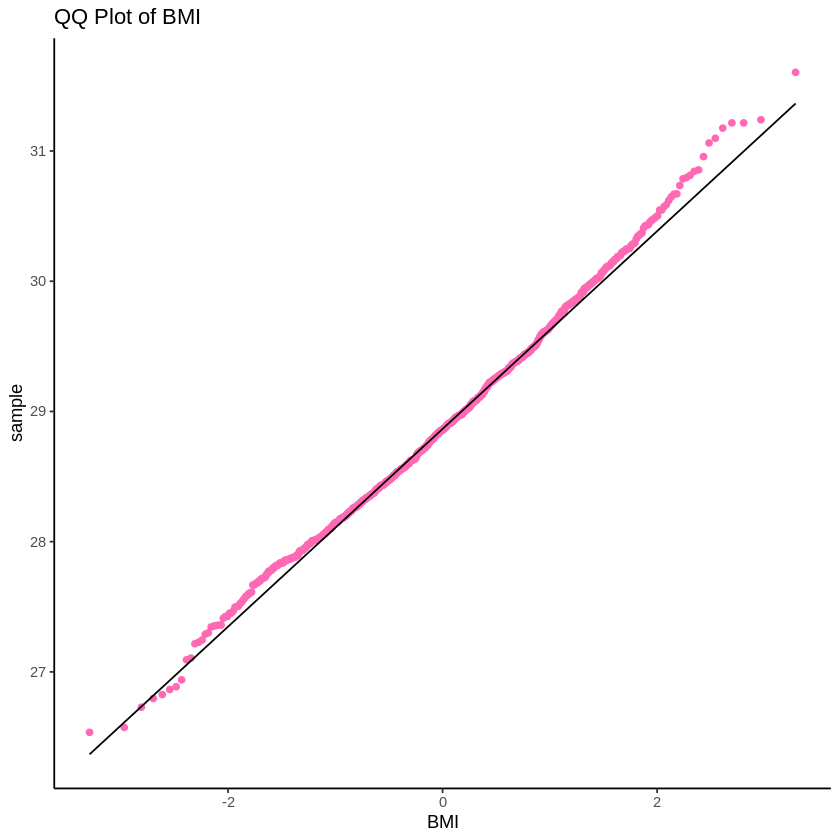

In [78]:
meansDf <- data.frame(mean=means)
qqBMI <- ggplot(meansDf, aes(sample=mean))
qqBMI <- qqBMI + stat_qq(col="hotpink") + geom_qq_line()
qqBMI <- qqBMI + labs(x="BMI", title="QQ Plot of BMI")
qqBMI <- qqBMI + theme_classic()
qqBMI

### __Question 9__
In this question, we want to compare the mean of health bill in different work type groups. At first, we put health bills of each group in a vactor. 

In [65]:
private <- healthCare[healthCare$work_type == "Private",]$health_bills
selfEmployed <- healthCare[healthCare$work_type == "Self-employed",]$health_bills
govtJob <- healthCare[healthCare$work_type == "Govt_job",]$health_bills
children <- healthCare[healthCare$work_type == "children",]$health_bills
neverWorked <- healthCare[healthCare$work_type == "Never_worked",]$health_bills

In this step, we state hypotheses as follows:

$$H_0: \mu_{private} = \mu_{self Employed} = \mu_{govtJob} = \mu_{children} = \mu_{neverWorked}$$


$$H_A: \text{At least one pair of means are different from each other.}$$



It is time to run ANOVA test to evaluate our hypotheses.

In [66]:
y <- c(private, selfEmployed, govtJob, children, neverWorked)
n <- c(length(private), length(selfEmployed), length(govtJob), length(children), 
        length(neverWorked))
group = rep(1:5, n)
tmpfn = function(x) c(sum = sum(x), mean = mean(x), var = var(x), n = length(x))
tapply(y, group, tmpfn)
data = data.frame(y = y, group = factor(group))
fit = lm(y ~ group, data)
anova(fit)

$`1`
        sum        mean         var           n 
9386642.075    3210.206  656619.842    2924.000 

$`2`
        sum        mean         var           n 
2649141.941    3234.606  780956.804     819.000 

$`3`
        sum        mean         var           n 
2092579.892    3185.053  604932.016     657.000 

$`4`
        sum        mean         var           n 
1820051.718    2649.275  275628.467     687.000 

$`5`
       sum       mean        var          n 
 66136.289   3006.195 344227.237     22.000

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,4,188756793,47189198.2,76.43072,4.868617e-63
Residuals,5104,3151267768,617411.4,NA,NA


Based on the result, the p-value is less than the significance level 0.05. So, we can conclude that there are significant differences between at least two groups. 

#### __Bonus__
For this part, we draw boxplot of **Health Bills** for each work type class. As we learnt in class, in multiple comparion there are two important faxctors that we should consider them:
* **Variability within groups:** We can analyze this by considering variance in each group. In other words, compactness of box can be agood metric for this analysis.
* **Variability between groups:** We can analyze this by comparing medians of these groups. The reason is that the skewness for an aproximately normal distribution is to small. As a result, the mean and median of such a distribution will be too close to each other. So, we can compare their medians. 

Moreover, the more overlap exists between boxes,the less differene in means they have.



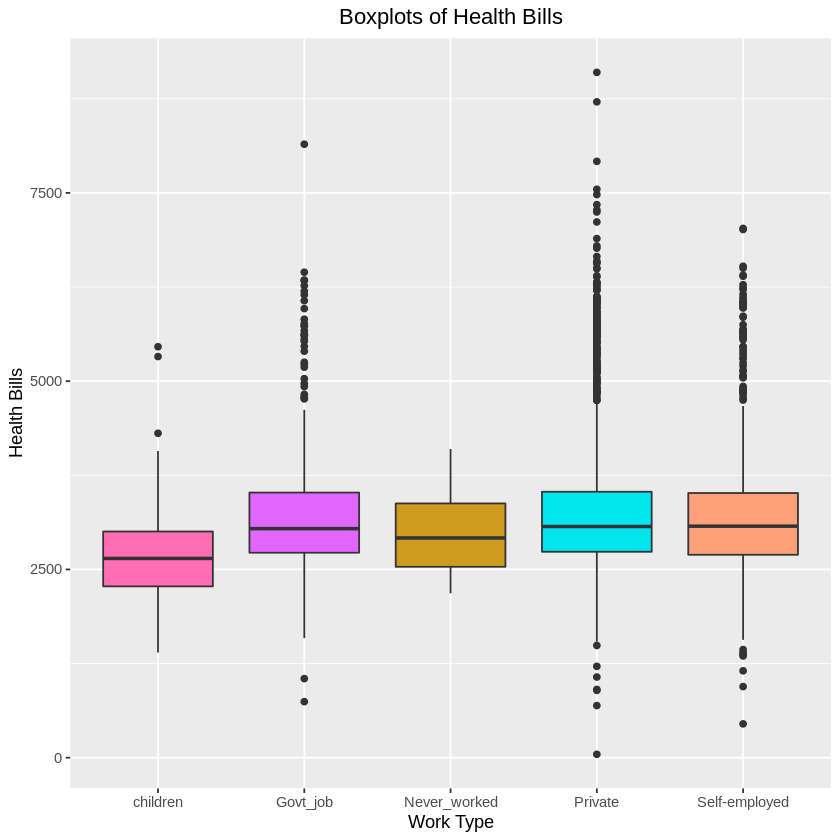

In [67]:
colors <- c("hotpink1", "mediumorchid1", "goldenrod3", "turquoise2", "lightsalmon1")

boxPlot <- ggplot(healthCare, aes(x = work_type, y = health_bills)) 
boxPlot <- boxPlot + geom_boxplot(fill = colors)
boxPlot <- boxPlot + ggtitle("Boxplots of Health Bills")
boxPlot <- boxPlot + xlab("Work Type") 
boxPlot <- boxPlot + ylab("Health Bills") 
boxPlot <- boxPlot + theme(plot.title = element_text(hjust = 0.5))
boxPlot

Based on the result, we can see that the median of **children** group has a significant difference with another groups. Moreover, the compactness of boxes are appropriate. So, we can conclude tha there is a significant difference between means of at least two groups. This conclusion is in agreement with the result of ANOVA test.

Now we have to find these pairs.

In this part, we compute significant level for our tests as follows:



$$K=\frac{k.(k-1)}{2} = \frac{5.(5-1)}{2} = 10$$


$$\alpha^* = \frac{\alpha}{K} = \frac{0.05}{10} = 0.005$$

##### __Private vs Self Employed__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{private} = \mu_{self Employed}$$


$$H_A: \mu_{private} \neq \mu_{self Employed}$$


Now we will evaluate our hypothesis with t-test.


In [68]:
t.test(private, selfEmployed, data = y)


	Welch Two Sample t-test

data:  private and selfEmployed
t = -0.71087, df = 1229.6, p-value = 0.4773
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -91.73900  42.93972
sample estimates:
mean of x mean of y 
 3210.206  3234.606 


$$p-value = 0.471 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Private** and **Government Job** groups are different.

##### __Private vs Government Job__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{private} = \mu_{government Job}$$


$$H_A: \mu_{private} \neq \mu_{government Job}$$


Now we will evaluate our hypothesis with t-test.


In [69]:
t.test(private, govtJob, data = y)


	Welch Two Sample t-test

data:  private and govtJob
t = 0.74323, df = 1001.6, p-value = 0.4575
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -41.25742  91.56302
sample estimates:
mean of x mean of y 
 3210.206  3185.053 


$$p-value = 0.253 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Self Employed** and **Government Job** groups are different.

##### __Private vs Children__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{private} = \mu_{children}$$


$$H_A: \mu_{private} \neq \mu_{children}$$


Now we will evaluate our hypothesis with t-test.


In [70]:
t.test(private, children, data = y)


	Welch Two Sample t-test

data:  private and children
t = 22.423, df = 1554.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 511.8638 609.9986
sample estimates:
mean of x mean of y 
 3210.206  2649.275 


$$p-value = 2.2e^{-16} < 0.005 \implies$$

We reject null hypothesis and conclude that there is significant evidence in the mean drop in health bills between the **Children** and **Private** groups.

##### __Private vs Never Worked__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{private} = \mu_{never Worked}$$


$$H_A: \mu_{private} \neq \mu_{never Worked}$$


Now we will evaluate our hypothesis with t-test.


In [71]:
t.test(private, neverWorked, data = y)


	Welch Two Sample t-test

data:  private and neverWorked
t = 1.6194, df = 21.607, p-value = 0.1199
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57.53375 465.55564
sample estimates:
mean of x mean of y 
 3210.206  3006.195 


$$p-value = 0.253 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Self Employed** and **Government Job** groups are different.

##### __Self Employed vs Government Job__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{self Employed} = \mu_{government Job}$$


$$H_A: \mu_{self Employed} \neq \mu_{government Job}$$


Now we will evaluate our hypothesis with t-test.


In [72]:
t.test(selfEmployed, govtJob, data = y)


	Welch Two Sample t-test

data:  selfEmployed and govtJob
t = 1.1446, df = 1461.4, p-value = 0.2526
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.37094 134.47582
sample estimates:
mean of x mean of y 
 3234.606  3185.053 


$$p-value = 0.253 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Self Employed** and **Government Job** groups are different.

##### __Self Employed vs Children__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{self Employed} = \mu_{children}$$


$$H_A: \mu_{self Employed} \neq \mu_{children}$$


Now we will evaluate our hypothesis with t-test.


In [73]:
t.test(selfEmployed, children, data = y)


	Welch Two Sample t-test

data:  selfEmployed and children
t = 15.903, df = 1363.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 513.1264 657.5353
sample estimates:
mean of x mean of y 
 3234.606  2649.275 


$$p-value = 2.2e^{-16} < 0.005 \implies$$

We reject null hypothesis and conclude that there is significant evidence in the mean drop in health bills between the **Children** and **Self Employed** groups.

##### __Self Employed vs Never Worked__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{self Employed} = \mu_{never Worked}$$


$$H_A: \mu_{self Employed} \neq \mu_{never Worked}$$


Now we will evaluate our hypothesis with t-test.


In [74]:
t.test(selfEmployed, neverWorked, data = y)


	Welch Two Sample t-test

data:  selfEmployed and neverWorked
t = 1.7728, df = 23.635, p-value = 0.08915
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -37.72337 494.54454
sample estimates:
mean of x mean of y 
 3234.606  3006.195 


$$p-value = 0.089 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Self Employed** and **Never worked** groups are different.

##### __Government Job vs Children__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{government Job} = \mu_{children}$$


$$H_A: \mu_{government Job} \neq \mu_{children}$$


Now we will evaluate our hypothesis with t-test.


In [75]:
t.test(govtJob, children, data = y)


	Welch Two Sample t-test

data:  govtJob and children
t = 14.736, df = 1144.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 464.4412 607.1156
sample estimates:
mean of x mean of y 
 3185.053  2649.275 


$$p-value = 2.2e^{-16} < 0.005 \implies$$

We reject null hypothesis and conclude that there is significant evidence in the mean drop in health bills between the **Children** and **Government Job** groups.

##### __Government Job vs Never Worked__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{government Job} = \mu_{never Worked}$$


$$H_A: \mu_{government Job} \neq \mu_{never Worked}$$


Now we will evaluate our hypothesis with t-test.


In [76]:
t.test(govtJob, neverWorked, data = y)


	Welch Two Sample t-test

data:  govtJob and neverWorked
t = 1.3896, df = 23.542, p-value = 0.1777
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -87.06965 444.78594
sample estimates:
mean of x mean of y 
 3185.053  3006.195 


$$p-value = 0.178 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Government Job** and **Never worked** groups are different.

##### __Never Worked vs Children__
At first, we state the null and alternative hypotheses:


$$H_0: \mu_{never Worked} = \mu_{children}$$


$$H_A: \mu_{never Worked} \neq \mu_{children}$$


Now we will evaluate our hypothesis with t-test.


In [77]:
t.test(children, neverWorked, data = y)


	Welch Two Sample t-test

data:  children and neverWorked
t = -2.8175, df = 22.09, p-value = 0.01
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -619.57687  -94.26366
sample estimates:
mean of x mean of y 
 2649.275  3006.195 


$$p-value = 0.01 > 0.005 \implies$$

We fail to reject null hypothesis. The data do not 
support the hypothesis that the mean of health bills between the **Children** and **Never worked** groups are different.